# Why Data Analysis?
- Data Analysis plays an important role in;
    - Discovering useful information
    - Answering questions
    - Predicting future or the unknown

# Case Study

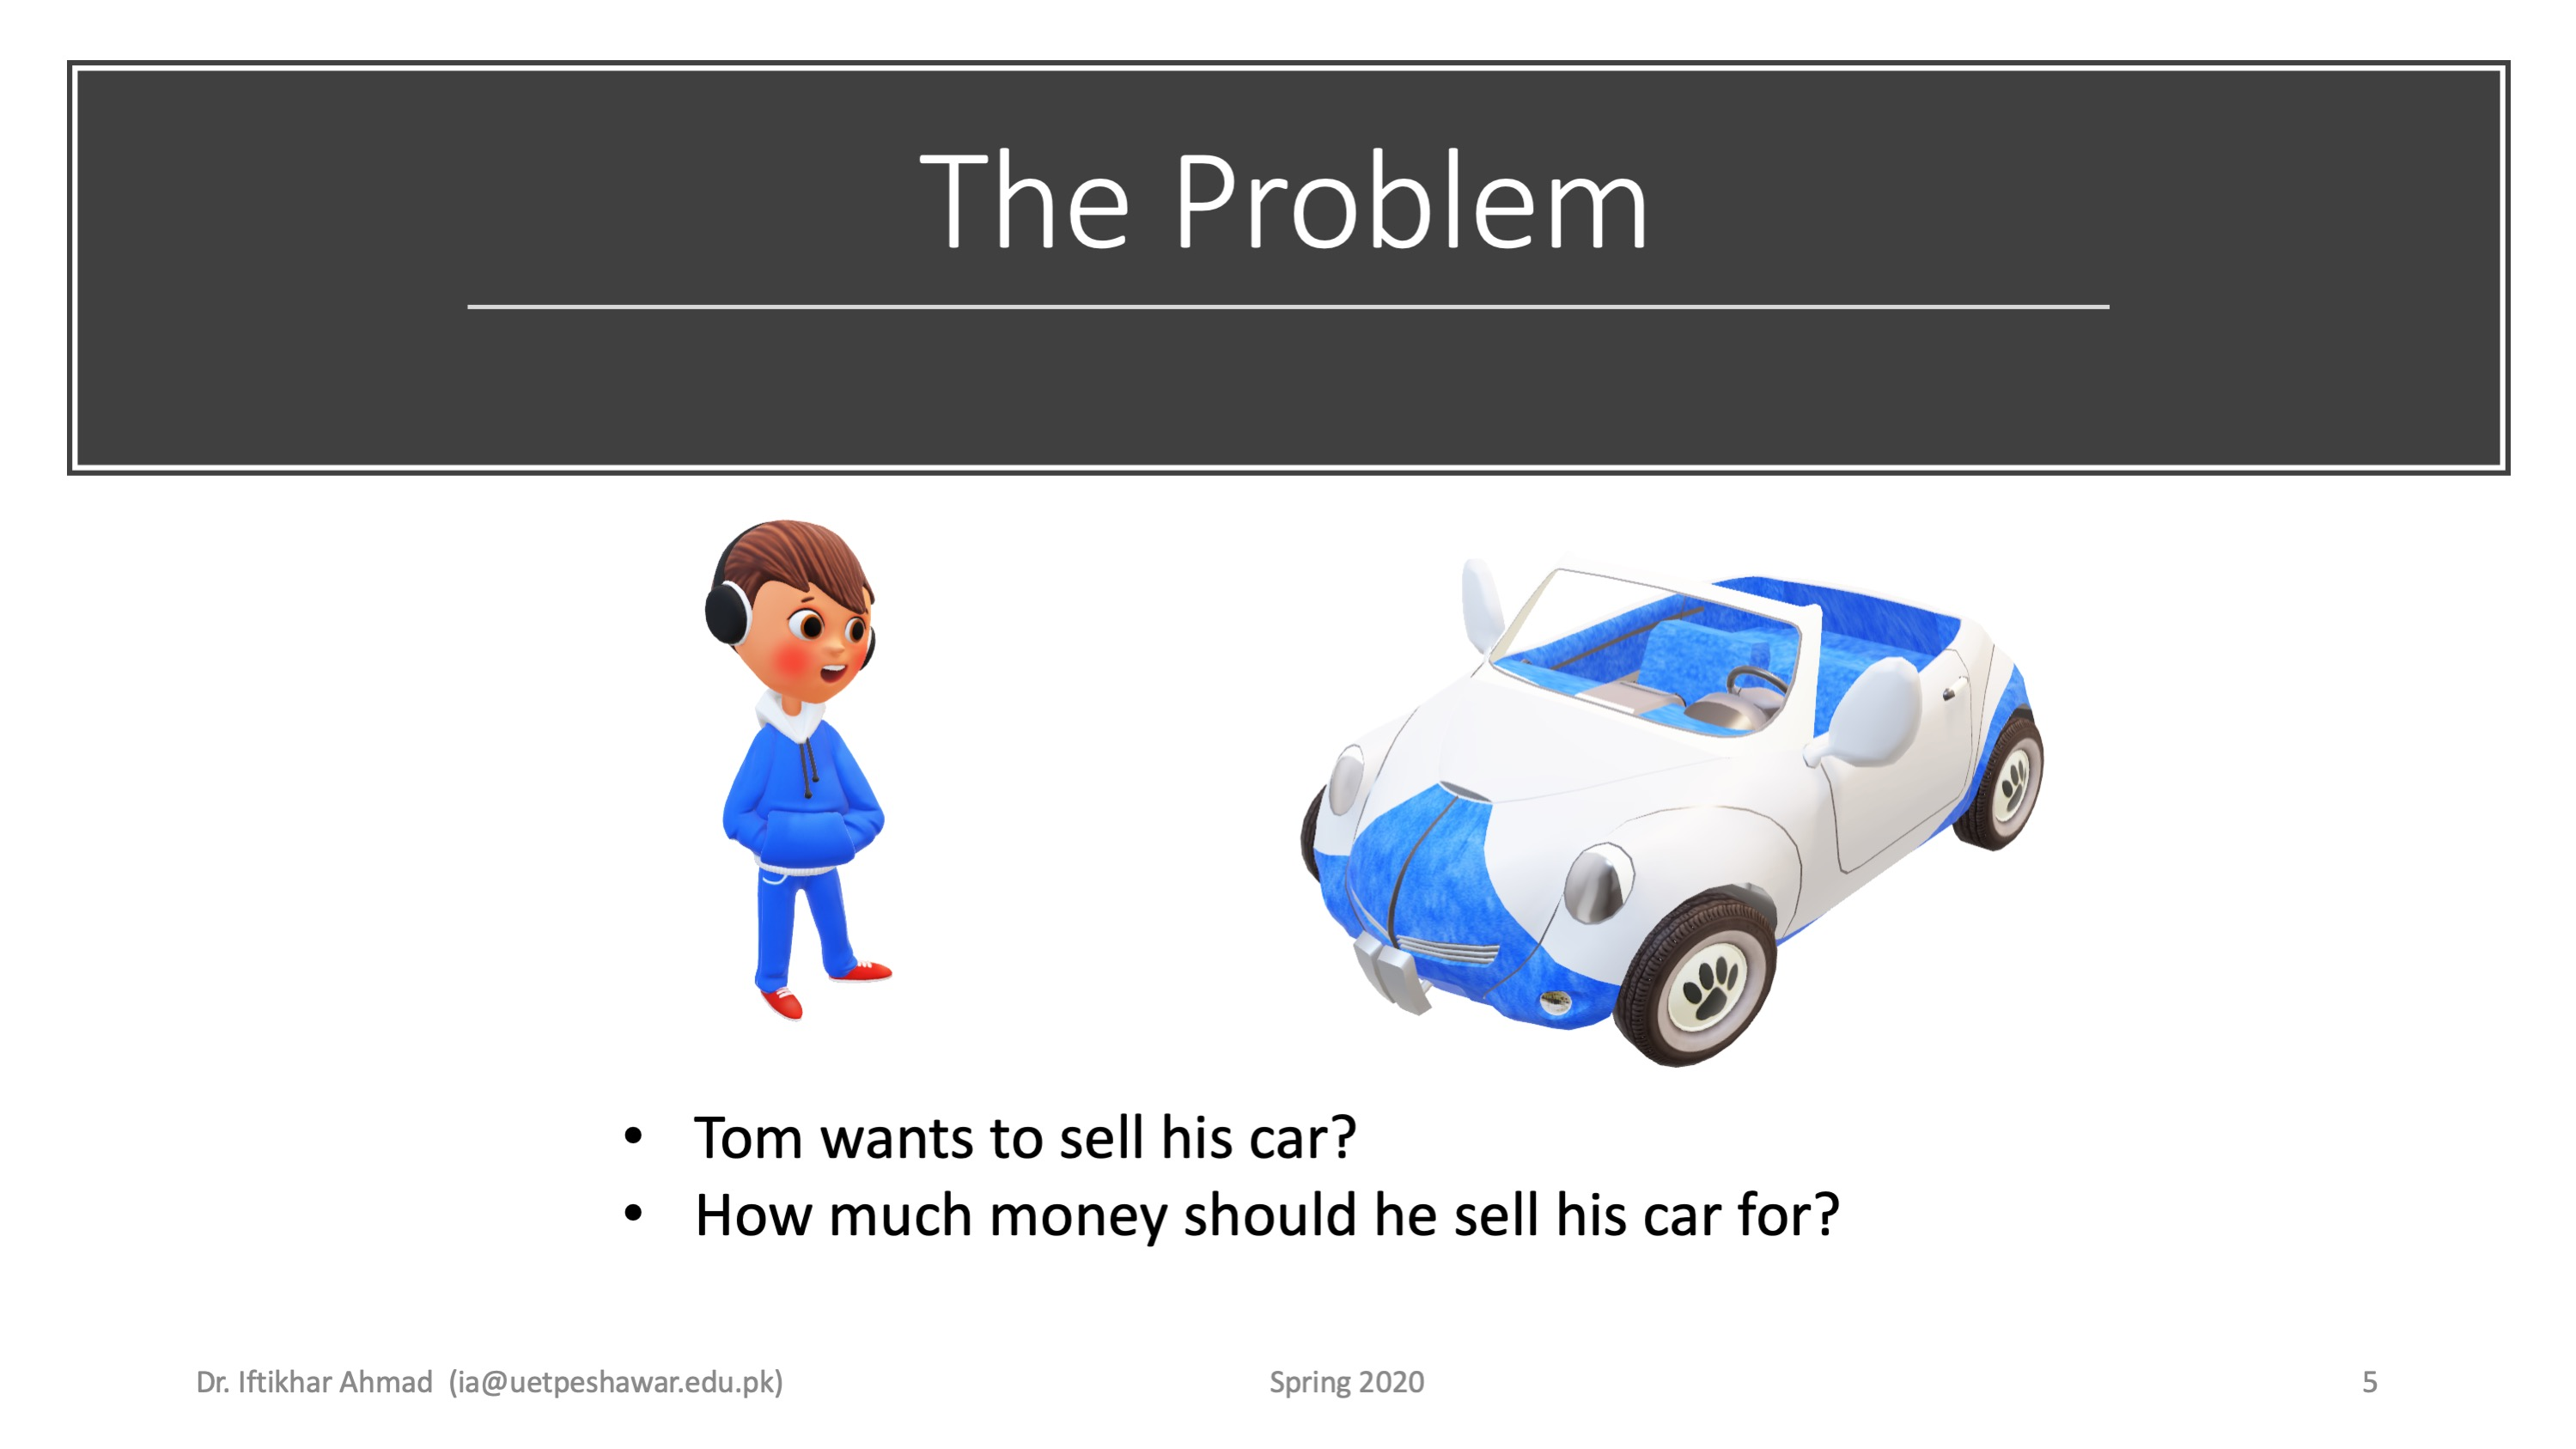

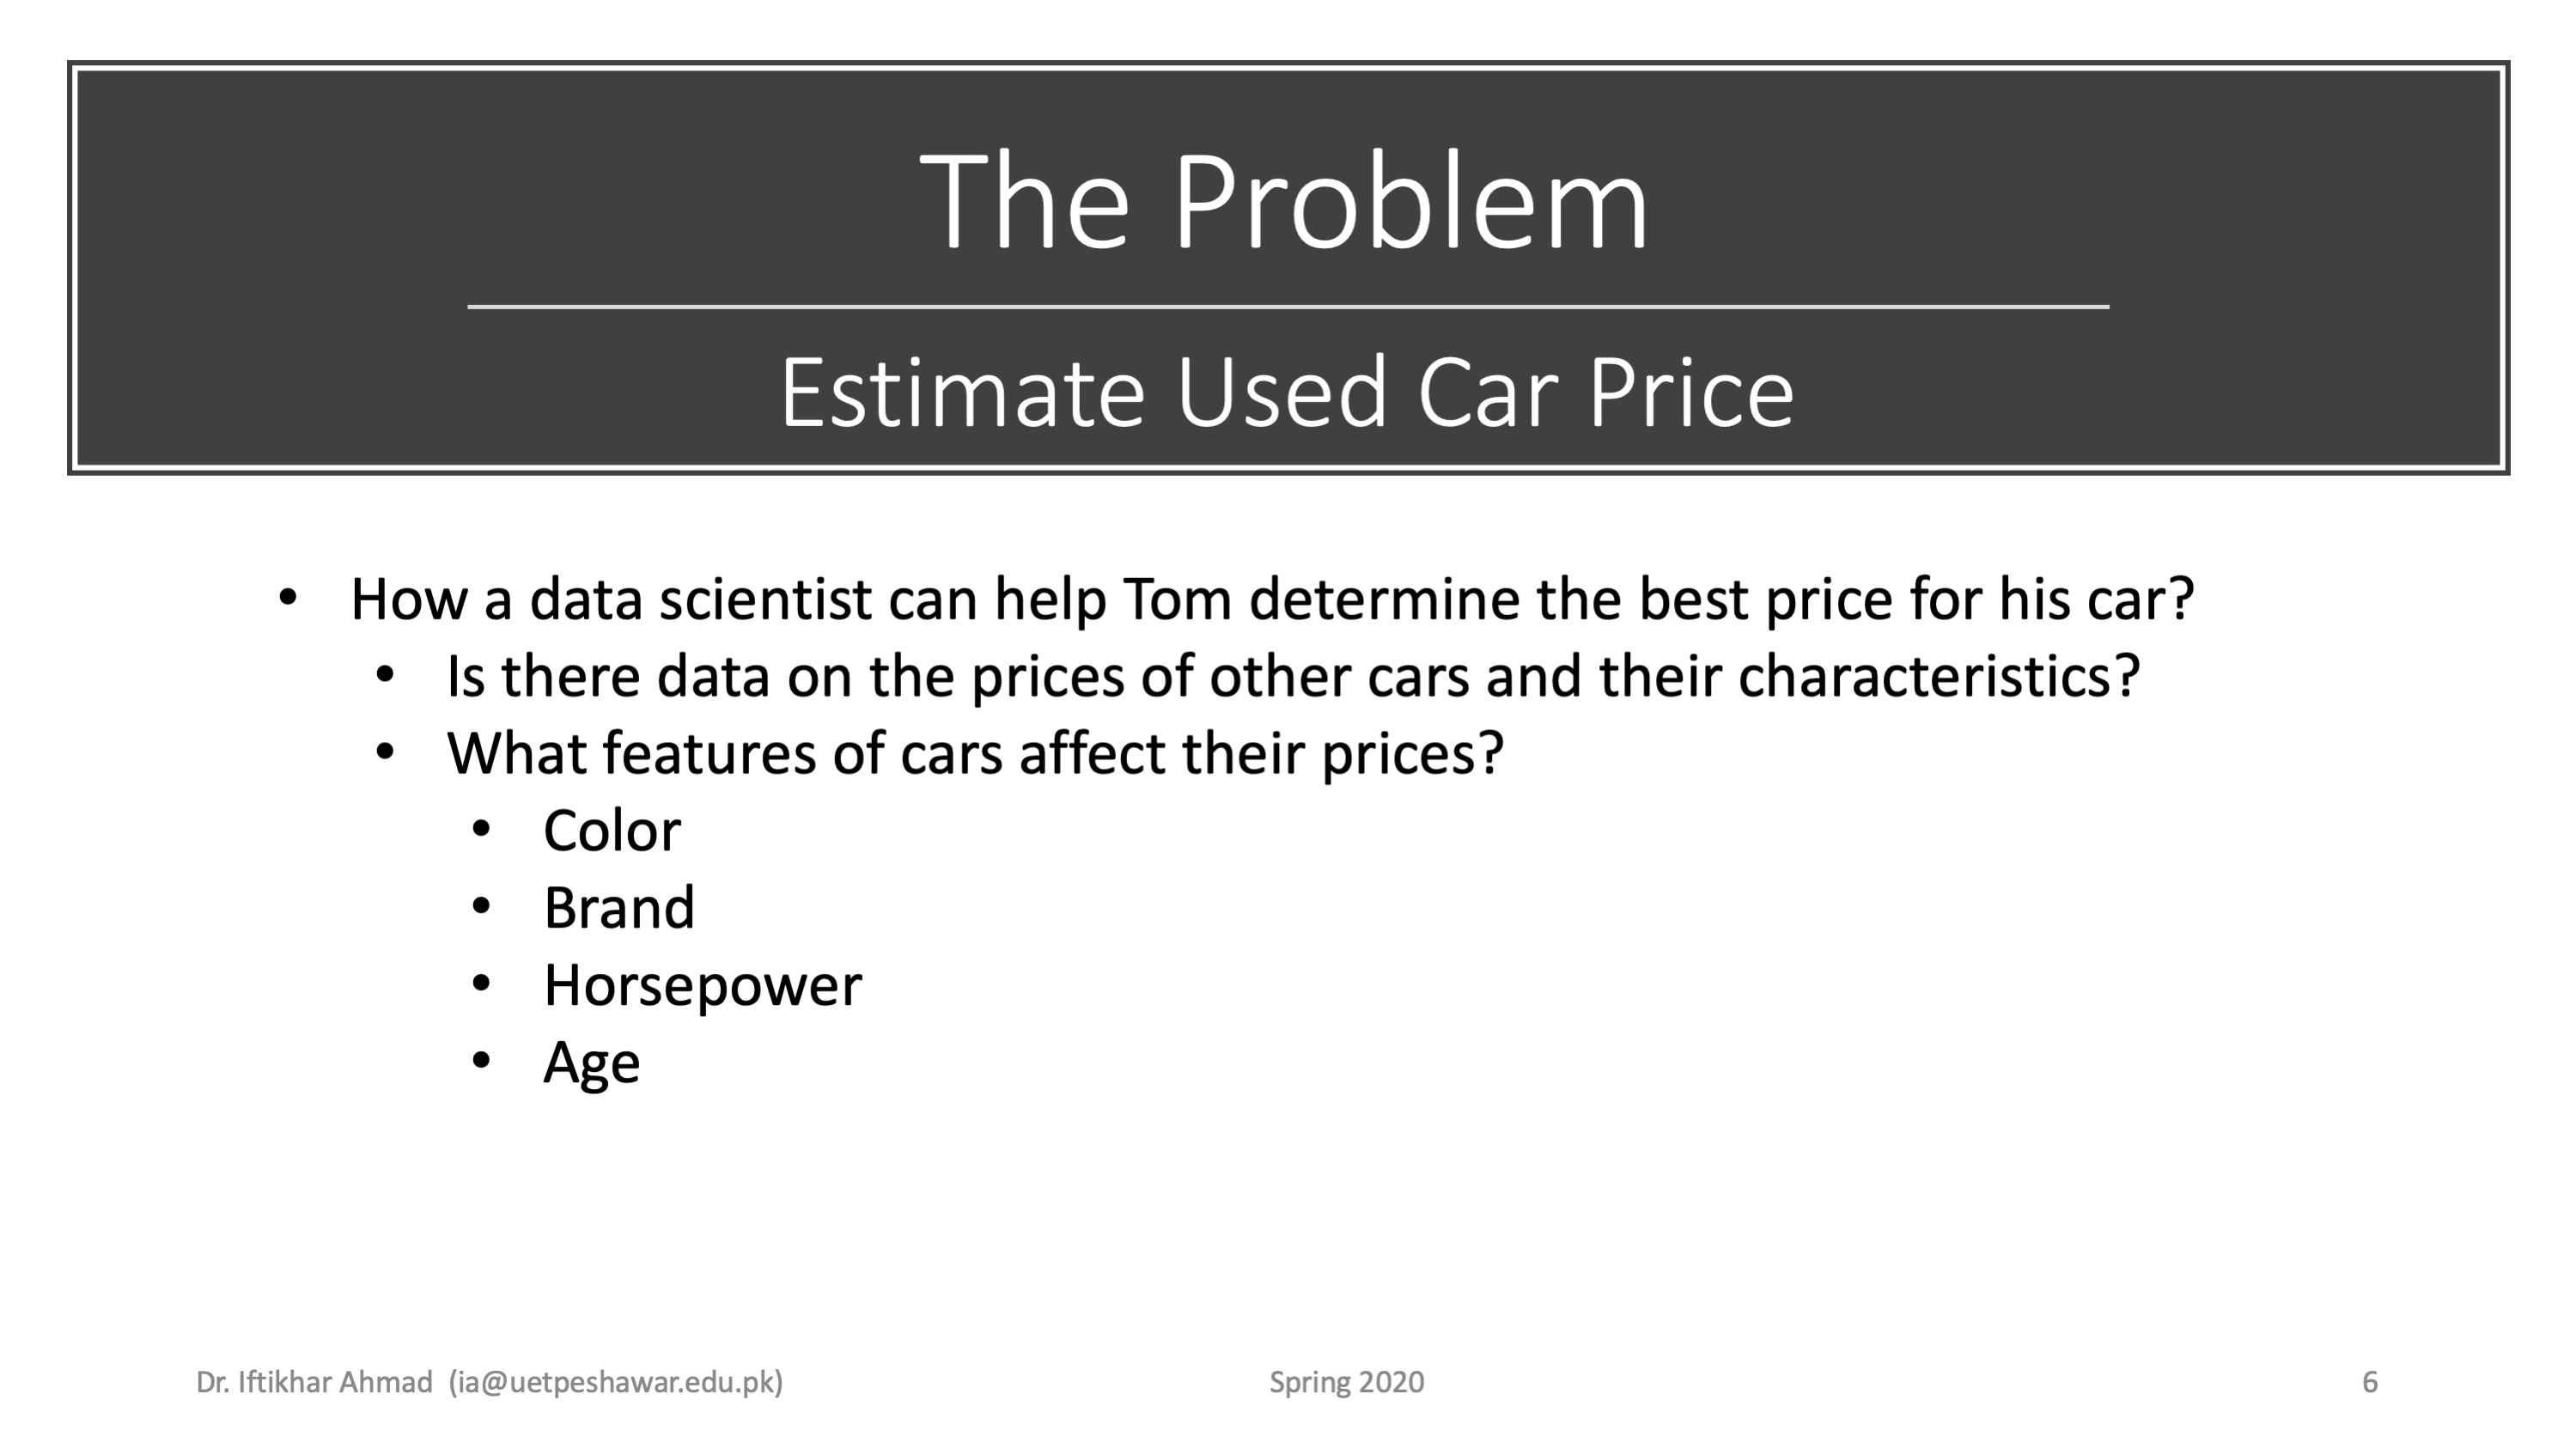

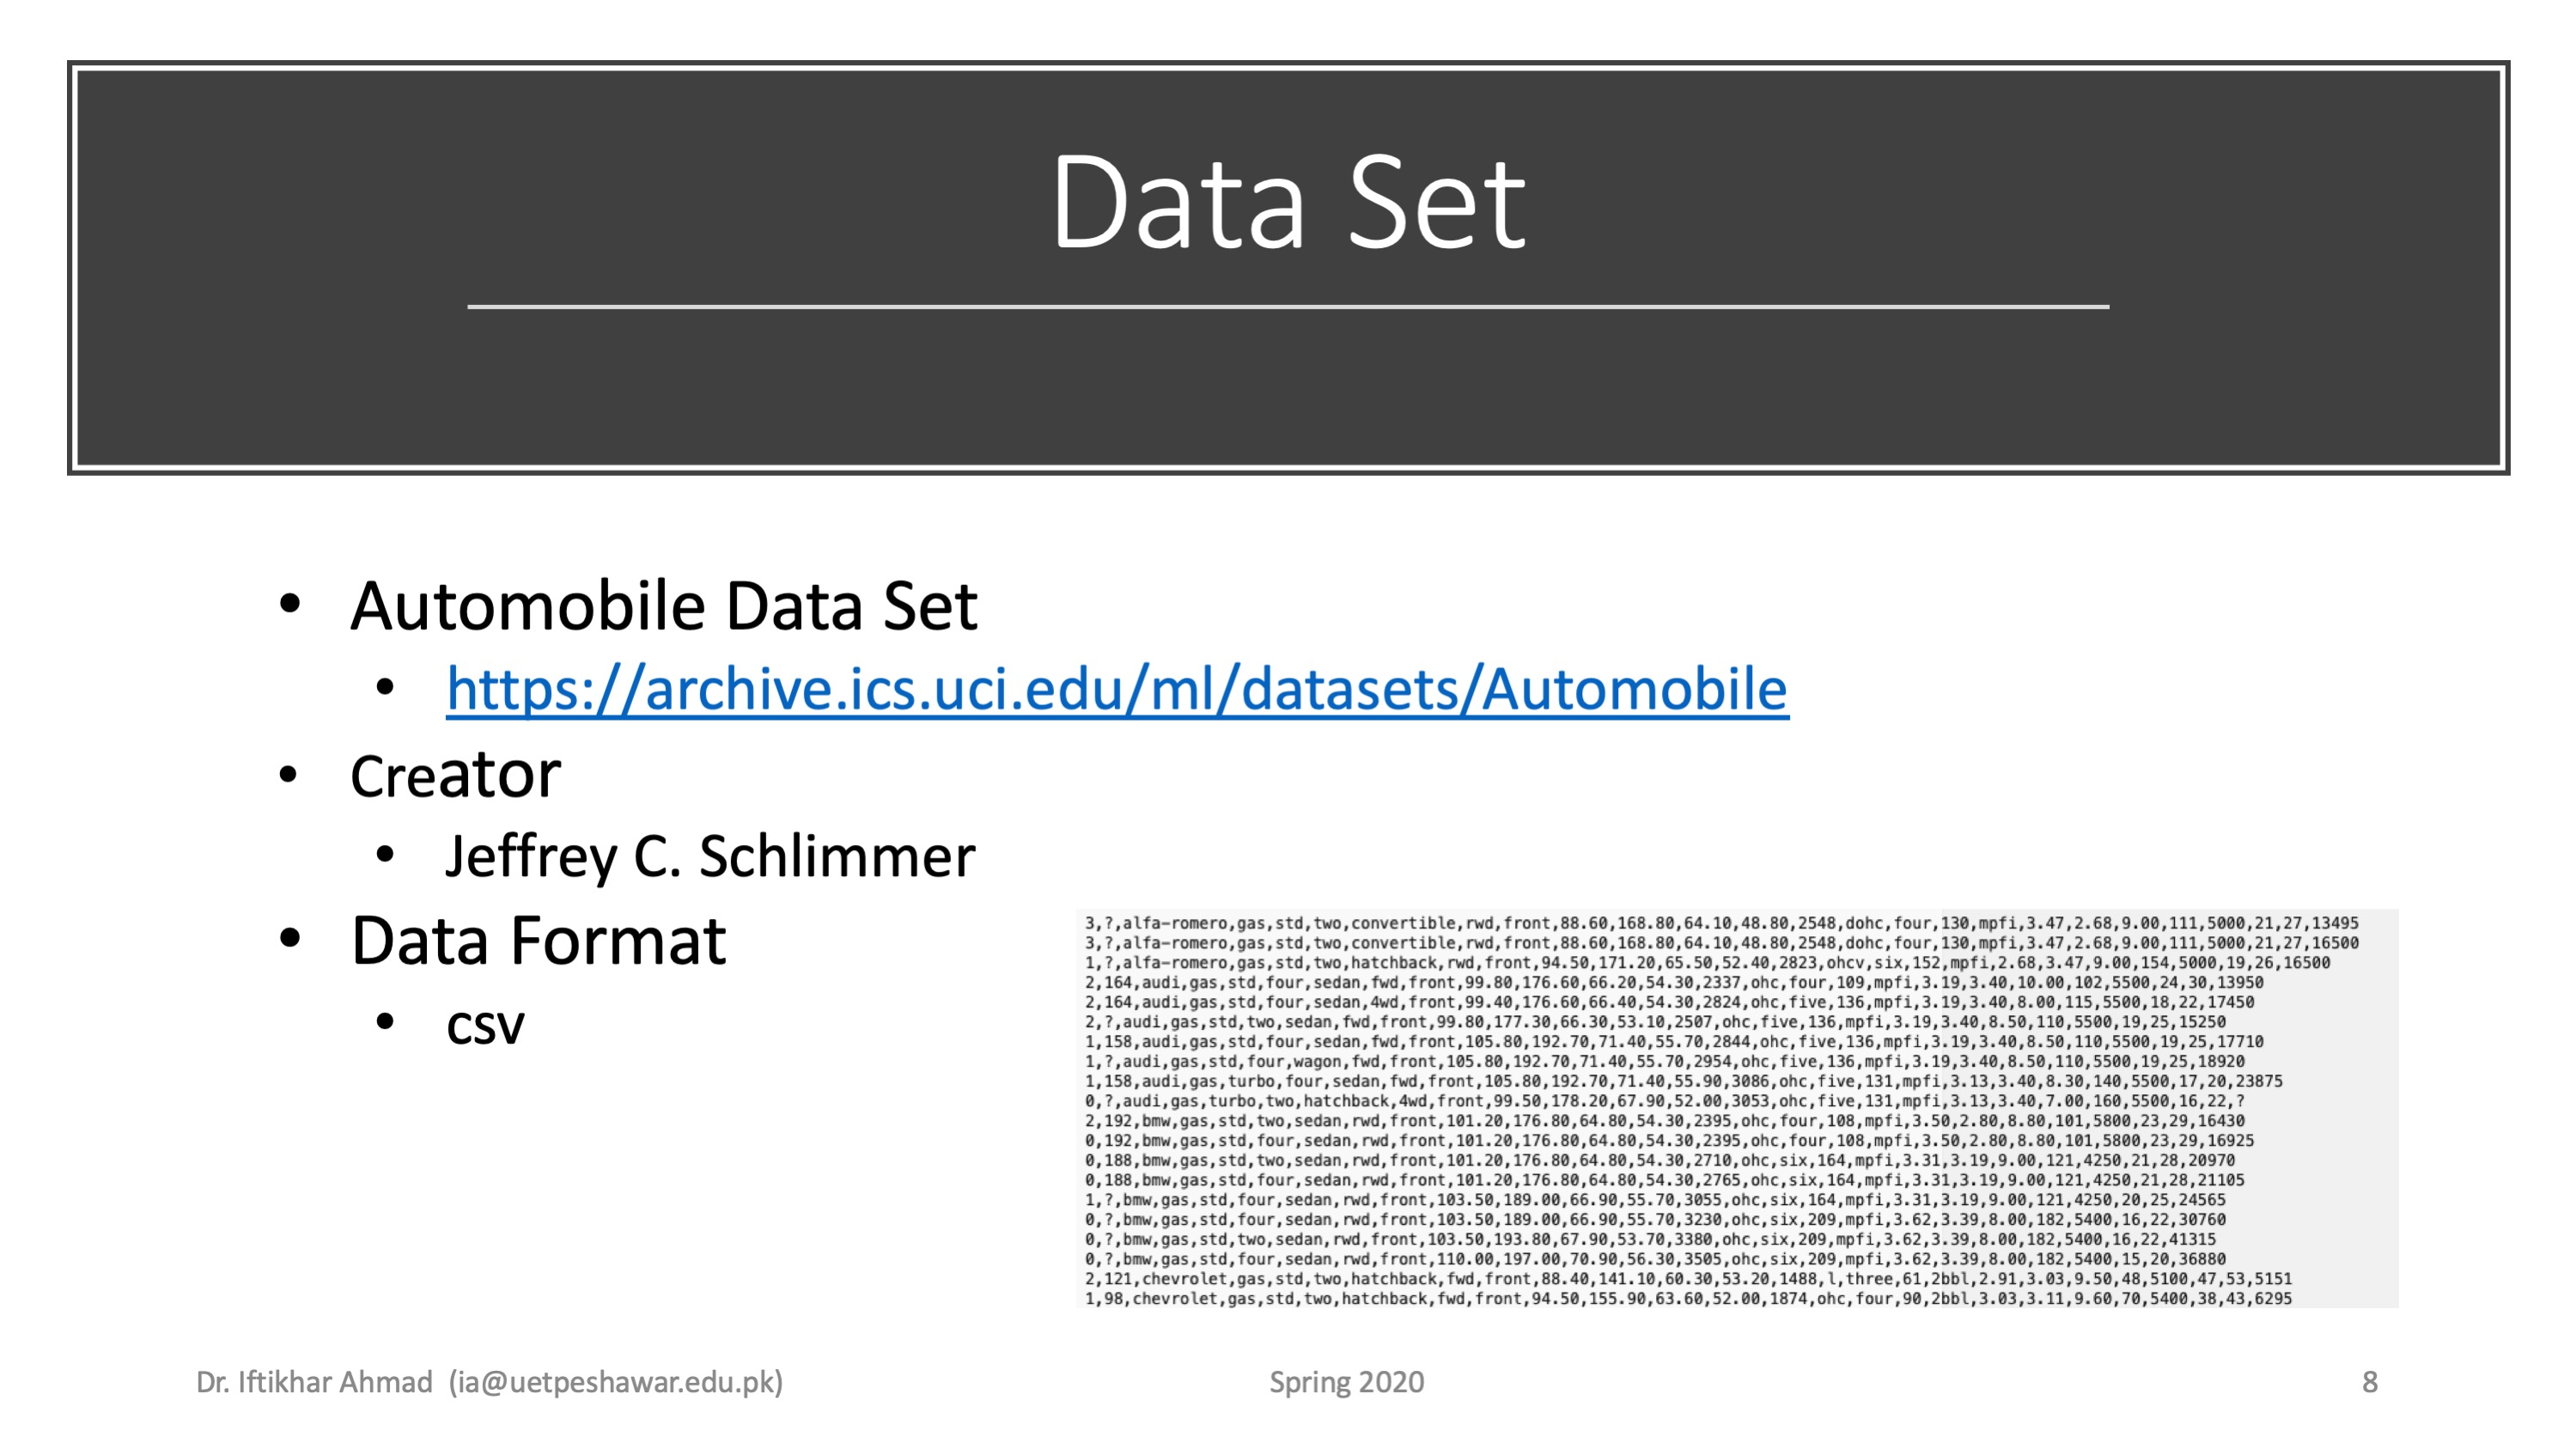

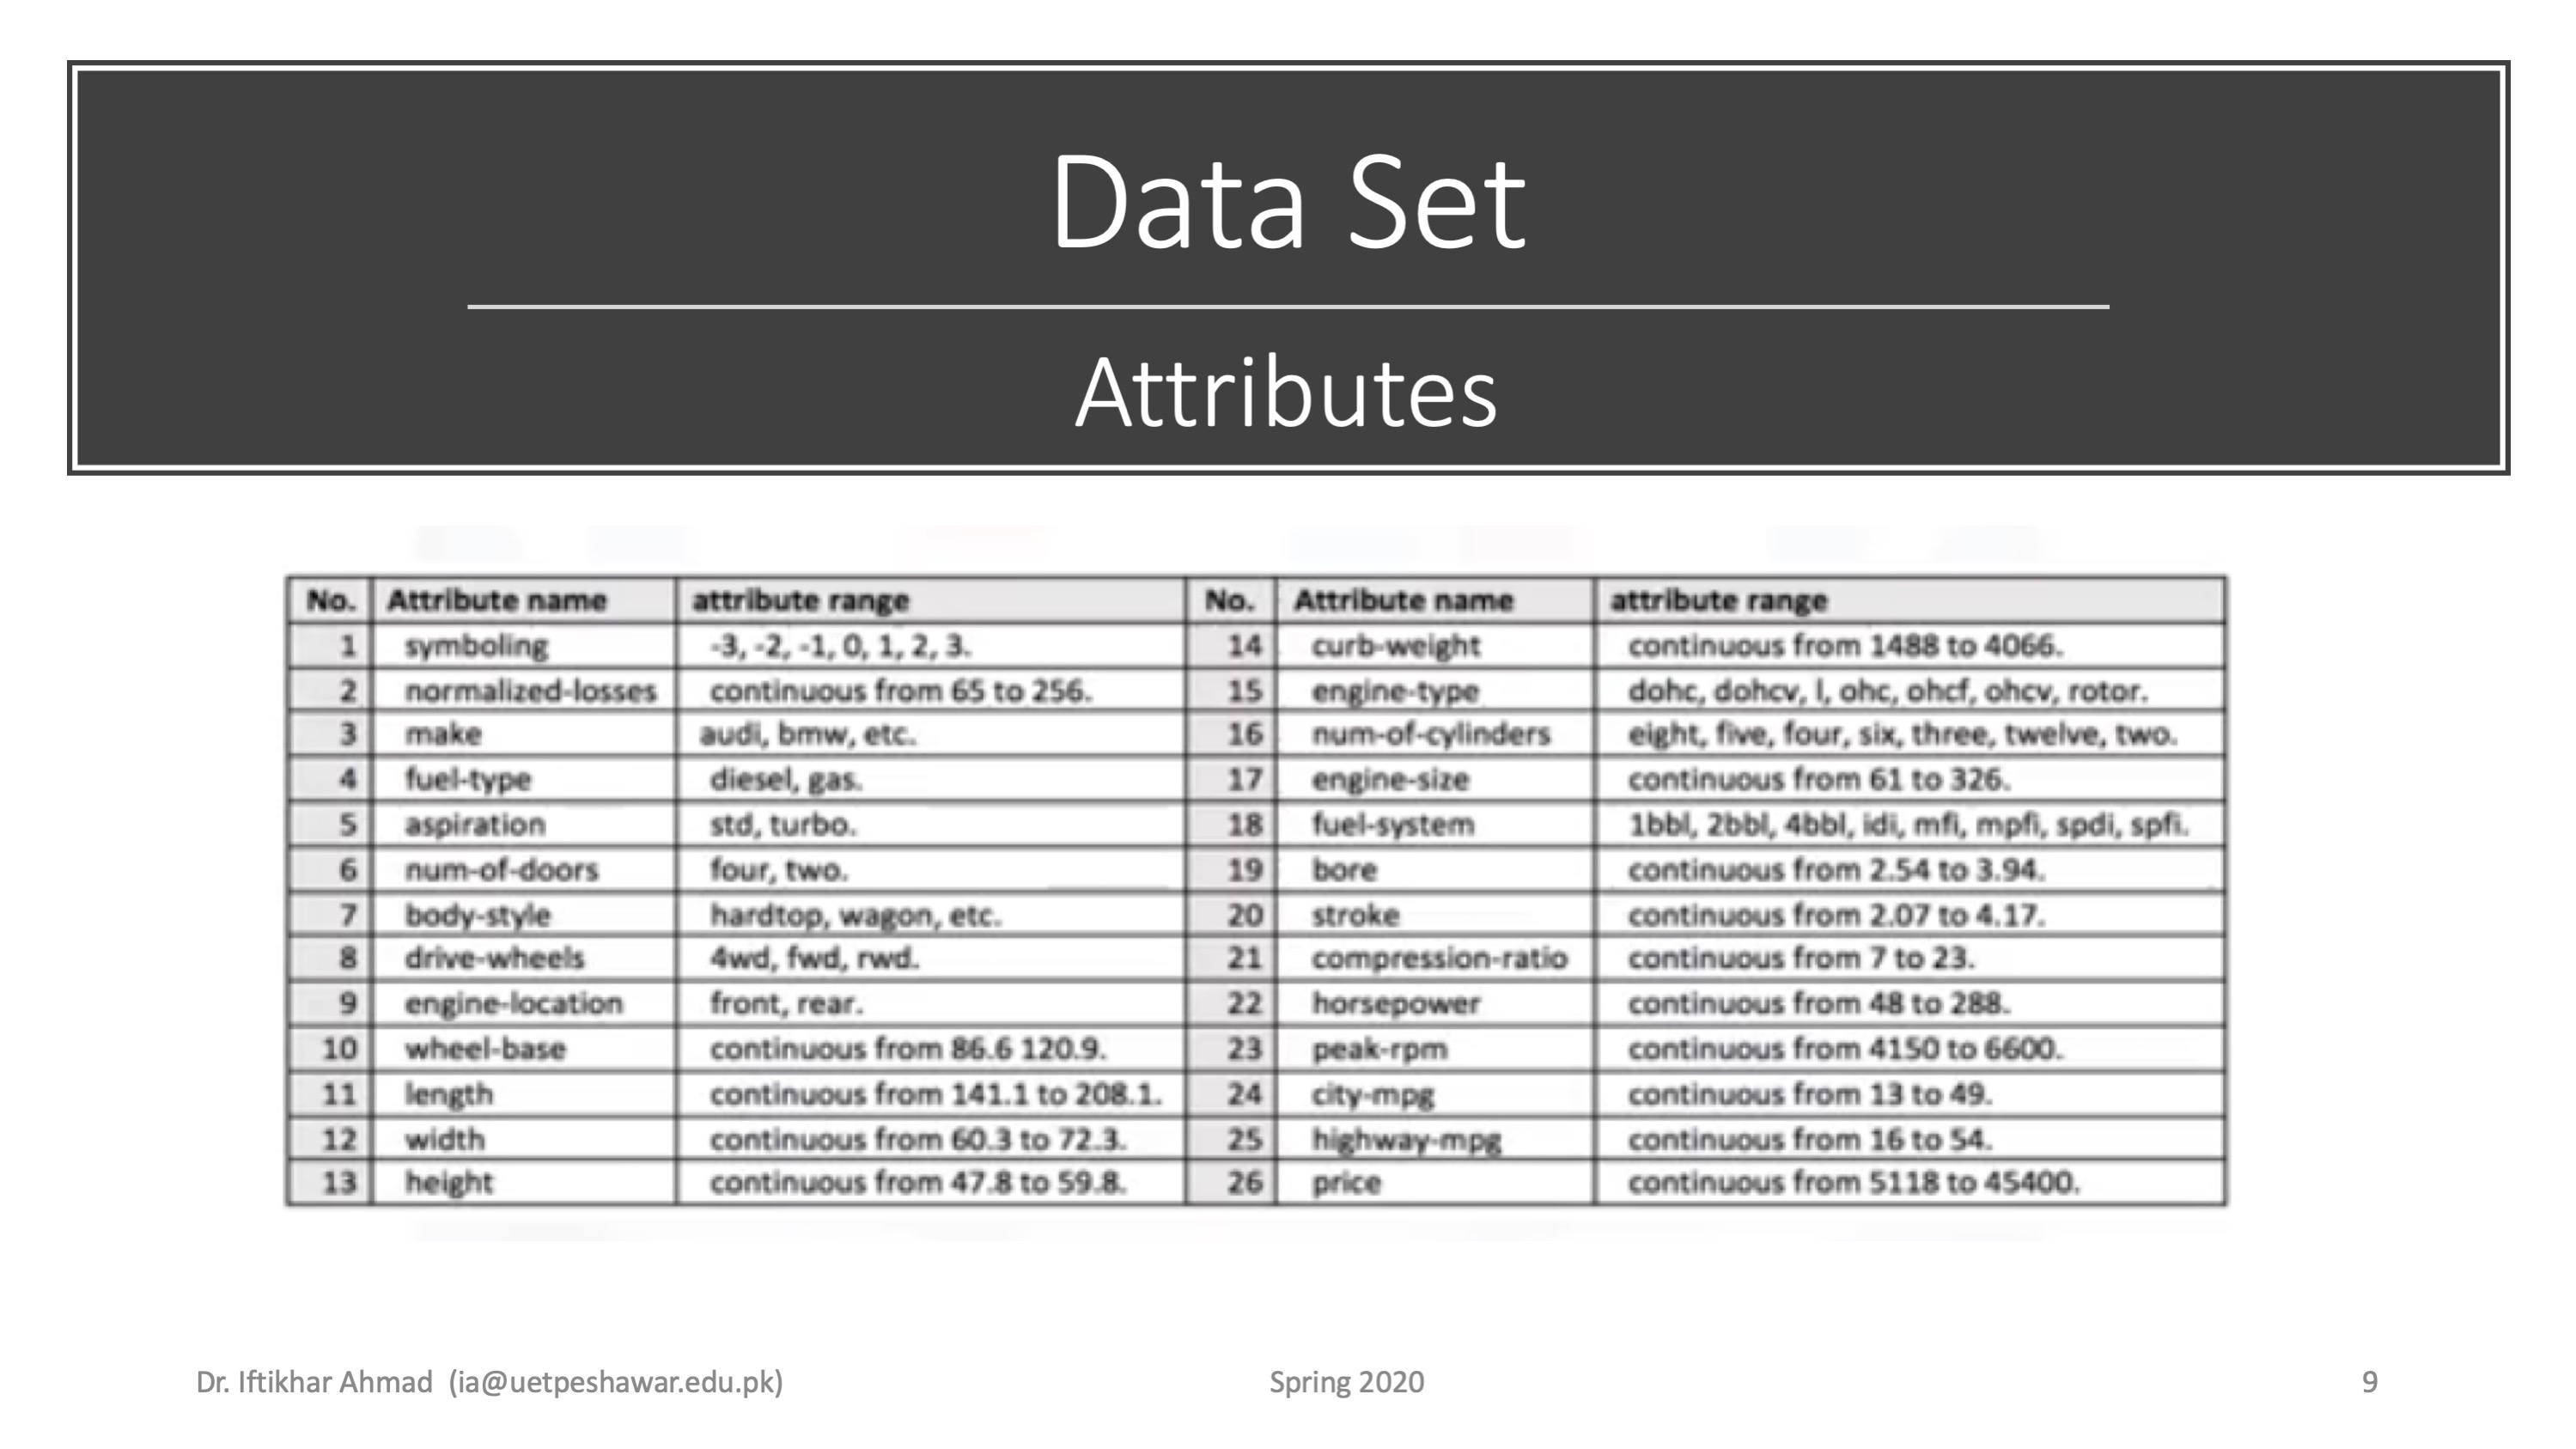

# Reading & Writing Data in Python

In [51]:
import pandas as pd
import numpy as np

In [52]:
path = "Auto85.csv"
df = pd.read_csv(path, header = None) #read_csv() assumes data has a header

In [53]:
headers = ["symboling","normalized-losses","make","fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels","engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "Price"]

In [54]:
df.columns = headers

In [55]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  Price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [56]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
Price                 object
dtype: object

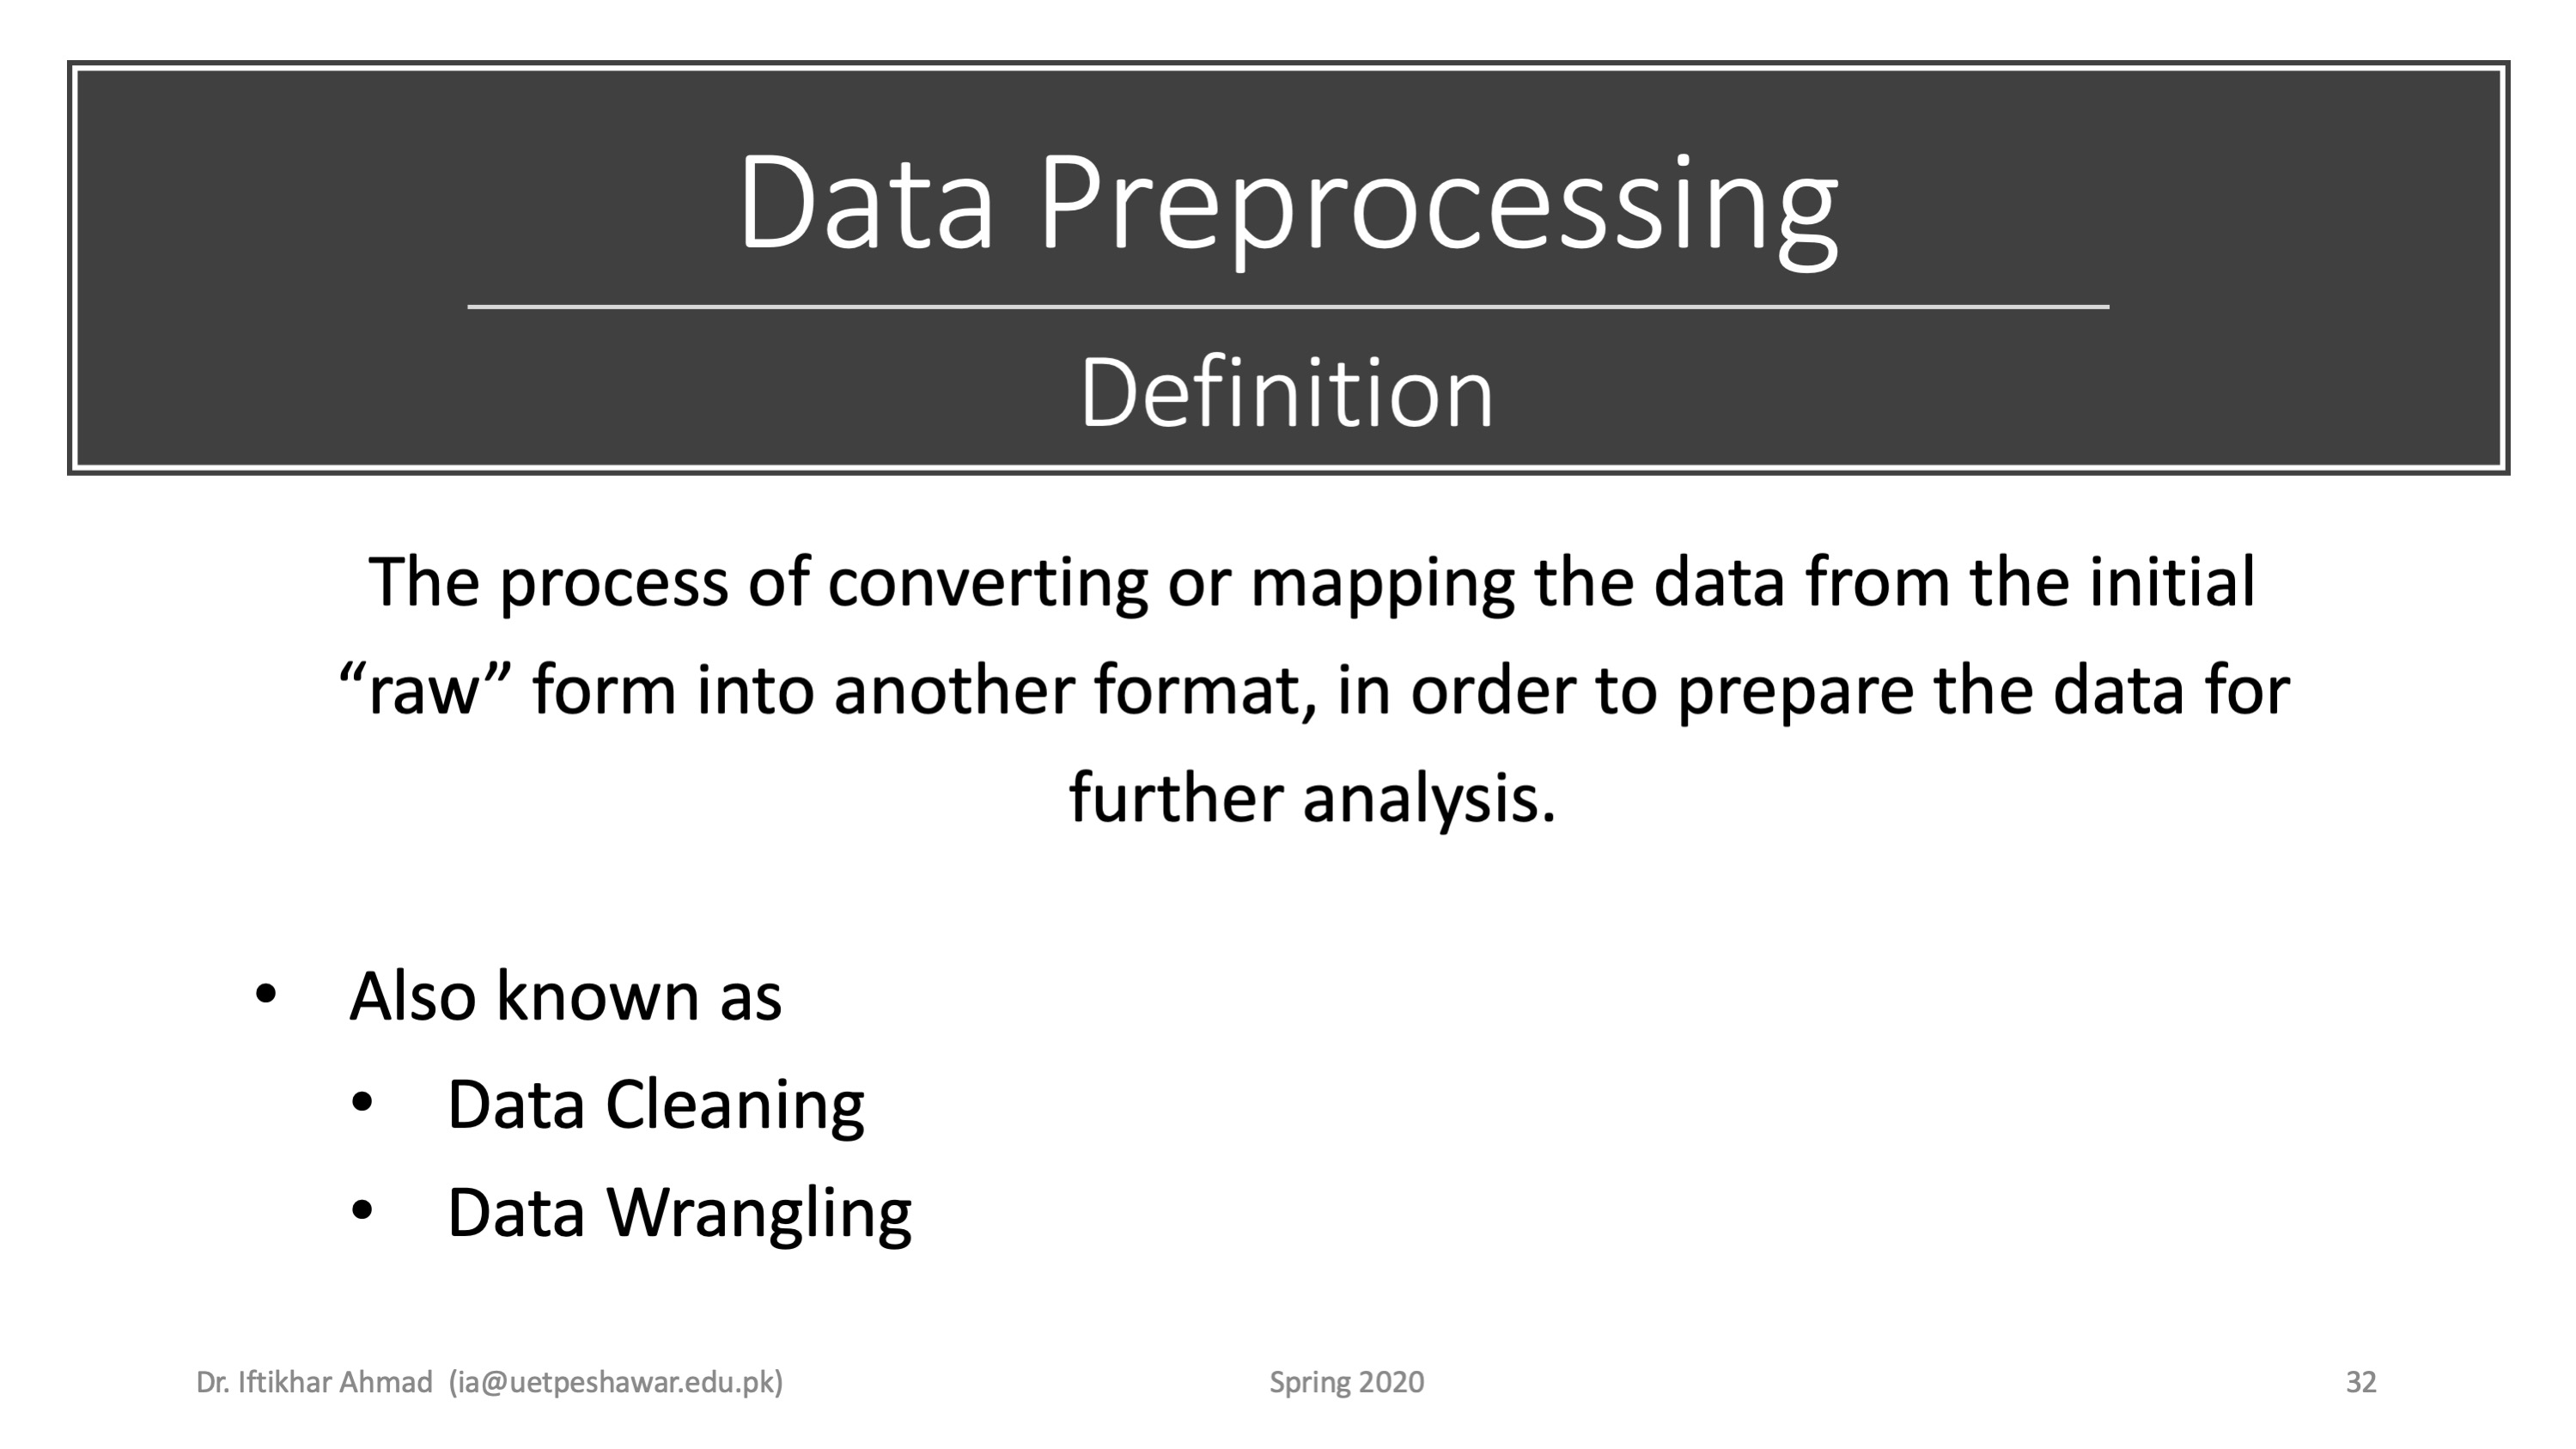

## Replace ? in _normalized-losses_ column by NAN

In [57]:
df["normalized-losses"]

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [58]:
df["normalized-losses"].replace("?", np.nan, inplace = True)

In [59]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"])

In [60]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
Price                 object
dtype: object

In [61]:
mean = df["normalized-losses"].mean()
mean

122.0

In [62]:
df["normalized-losses"].replace(np.nan, mean, inplace=True)

In [63]:
df["normalized-losses"]

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

## Calculate average values based on other features

In [64]:
df[["normalized-losses","make"]]

normalized-losses         make
0                122.0  alfa-romero
1                122.0  alfa-romero
2                122.0  alfa-romero
3                164.0         audi
4                164.0         audi
..                 ...          ...
200               95.0        volvo
201               95.0        volvo
202               95.0        volvo
203               95.0        volvo
204               95.0        volvo

[205 rows x 2 columns]

In [65]:
df.groupby("make").mean()

symboling  normalized-losses  wheel-base      length  \
make                                                                  
alfa-romero     2.333333         122.000000   90.566667  169.600000   
audi            1.285714         144.285714  102.271429  183.828571   
bmw             0.375000         156.000000  103.162500  184.500000   
chevrolet       1.000000         100.000000   92.466667  151.933333   
dodge           1.000000         133.444444   95.011111  160.988889   
honda           0.615385         103.000000   94.330769  160.769231   
isuzu           0.750000         122.000000   94.825000  163.775000   
jaguar          0.000000         129.666667  109.333333  196.966667   
mazda           1.117647         123.705882   97.017647  170.805882   
mercedes-benz   0.000000         110.000000  110.925000  195.262500   
mercury         1.000000         122.000000  102.700000  178.400000   
mitsubishi      1.846154         140.615385   95.353846  168.030769   
nissan          1.000000         135.166667   95.722222  170.988889   
peugot          0.000000         146.818182  110.200000  191.136364   
plymouth        1.000000         128.000000   95.385714  164.900000   
porsche         2.600000         134.800000   92.280000  170.260000   
renault         1.000000         122.000000   96.100000  179.150000   
saab            2.500000         127.000000   99.100000  186.600000   
subaru          0.500000          92.250000   96.175000  168.858333   
toyota          0.562500         110.656250   98.103125  171.934375   
volkswagen      1.666667         121.500000   97.608333  172.533333   
volvo          -1.272727          91.454545  106.481818  188.800000   

                   width     height  curb-weight  engine-size  \
make                                                            
alfa-romero    64.566667  50.000000  2639.666667   137.333333   
audi           68.714286  54.428571  2800.714286   130.714286   
bmw            66.475000  54.825000  2929.375000   166.875000   
chevrolet      62.500000  52.400000  1757.000000    80.333333   
dodge          64.166667  51.644444  2151.333333   102.666667   
honda          64.384615  53.238462  2096.769231    99.307692   
isuzu          63.550000  52.225000  2213.500000   102.500000   
jaguar         69.933333  51.133333  4027.333333   280.666667   
mazda          65.588235  53.358824  2297.823529   103.000000   
mercedes-benz  71.062500  55.725000  3696.250000   226.500000   
mercury        68.000000  54.800000  2910.000000   140.000000   
mitsubishi     65.253846  50.692308  2381.923077   118.307692   
nissan         65.088889  53.633333  2400.388889   127.888889   
peugot         68.390909  57.181818  3221.000000   135.818182   
plymouth       64.271429  51.971429  2220.857143   106.285714   
porsche        67.120000  51.100000  2891.200000   187.200000   
renault        66.550000  52.850000  2519.500000   132.000000   
saab           66.500000  56.100000  2745.500000   121.000000   
subaru         64.950000  53.750000  2316.250000   107.083333   
toyota         65.090625  53.721875  2441.093750   118.812500   
volkswagen     65.616667  55.183333  2343.166667   107.250000   
volvo          67.963636  56.236364  3037.909091   142.272727   

               compression-ratio   city-mpg  highway-mpg  
make                                                      
alfa-romero             9.000000  20.333333    26.666667  
audi                    8.400000  18.857143    24.142857  
bmw                     8.575000  19.375000    25.375000  
chevrolet               9.566667  41.000000    46.333333  
dodge                   8.634444  28.000000    34.111111  
honda                   9.215385  30.384615    35.461538  
isuzu                   9.225000  31.000000    36.000000  
jaguar                  9.233333  14.333333    18.333333  
mazda                  10.488235  25.705882    31.941176  
mercedes-benz          14.825000  18.500000    21.000000  
mercury                 8.000000  19.0000

In [66]:
t = df.groupby("make").mean()
t

symboling  normalized-losses  wheel-base      length  \
make                                                                  
alfa-romero     2.333333         122.000000   90.566667  169.600000   
audi            1.285714         144.285714  102.271429  183.828571   
bmw             0.375000         156.000000  103.162500  184.500000   
chevrolet       1.000000         100.000000   92.466667  151.933333   
dodge           1.000000         133.444444   95.011111  160.988889   
honda           0.615385         103.000000   94.330769  160.769231   
isuzu           0.750000         122.000000   94.825000  163.775000   
jaguar          0.000000         129.666667  109.333333  196.966667   
mazda           1.117647         123.705882   97.017647  170.805882   
mercedes-benz   0.000000         110.000000  110.925000  195.262500   
mercury         1.000000         122.000000  102.700000  178.400000   
mitsubishi      1.846154         140.615385   95.353846  168.030769   
nissan          1.000000         135.166667   95.722222  170.988889   
peugot          0.000000         146.818182  110.200000  191.136364   
plymouth        1.000000         128.000000   95.385714  164.900000   
porsche         2.600000         134.800000   92.280000  170.260000   
renault         1.000000         122.000000   96.100000  179.150000   
saab            2.500000         127.000000   99.100000  186.600000   
subaru          0.500000          92.250000   96.175000  168.858333   
toyota          0.562500         110.656250   98.103125  171.934375   
volkswagen      1.666667         121.500000   97.608333  172.533333   
volvo          -1.272727          91.454545  106.481818  188.800000   

                   width     height  curb-weight  engine-size  \
make                                                            
alfa-romero    64.566667  50.000000  2639.666667   137.333333   
audi           68.714286  54.428571  2800.714286   130.714286   
bmw            66.475000  54.825000  2929.375000   166.875000   
chevrolet      62.500000  52.400000  1757.000000    80.333333   
dodge          64.166667  51.644444  2151.333333   102.666667   
honda          64.384615  53.238462  2096.769231    99.307692   
isuzu          63.550000  52.225000  2213.500000   102.500000   
jaguar         69.933333  51.133333  4027.333333   280.666667   
mazda          65.588235  53.358824  2297.823529   103.000000   
mercedes-benz  71.062500  55.725000  3696.250000   226.500000   
mercury        68.000000  54.800000  2910.000000   140.000000   
mitsubishi     65.253846  50.692308  2381.923077   118.307692   
nissan         65.088889  53.633333  2400.388889   127.888889   
peugot         68.390909  57.181818  3221.000000   135.818182   
plymouth       64.271429  51.971429  2220.857143   106.285714   
porsche        67.120000  51.100000  2891.200000   187.200000   
renault        66.550000  52.850000  2519.500000   132.000000   
saab           66.500000  56.100000  2745.500000   121.000000   
subaru         64.950000  53.750000  2316.250000   107.083333   
toyota         65.090625  53.721875  2441.093750   118.812500   
volkswagen     65.616667  55.183333  2343.166667   107.250000   
volvo          67.963636  56.236364  3037.909091   142.272727   

               compression-ratio   city-mpg  highway-mpg  
make                                                      
alfa-romero             9.000000  20.333333    26.666667  
audi                    8.400000  18.857143    24.142857  
bmw                     8.575000  19.375000    25.375000  
chevrolet               9.566667  41.000000    46.333333  
dodge                   8.634444  28.000000    34.111111  
honda                   9.215385  30.384615    35.461538  
isuzu                   9.225000  31.000000    36.000000  
jaguar                  9.233333  14.333333    18.333333  
mazda                  10.488235  25.705882    31.941176  
mercedes-benz          14.825000  18.500000    21.000000  
mercury                 8.000000  19.0000

# Data Formatting

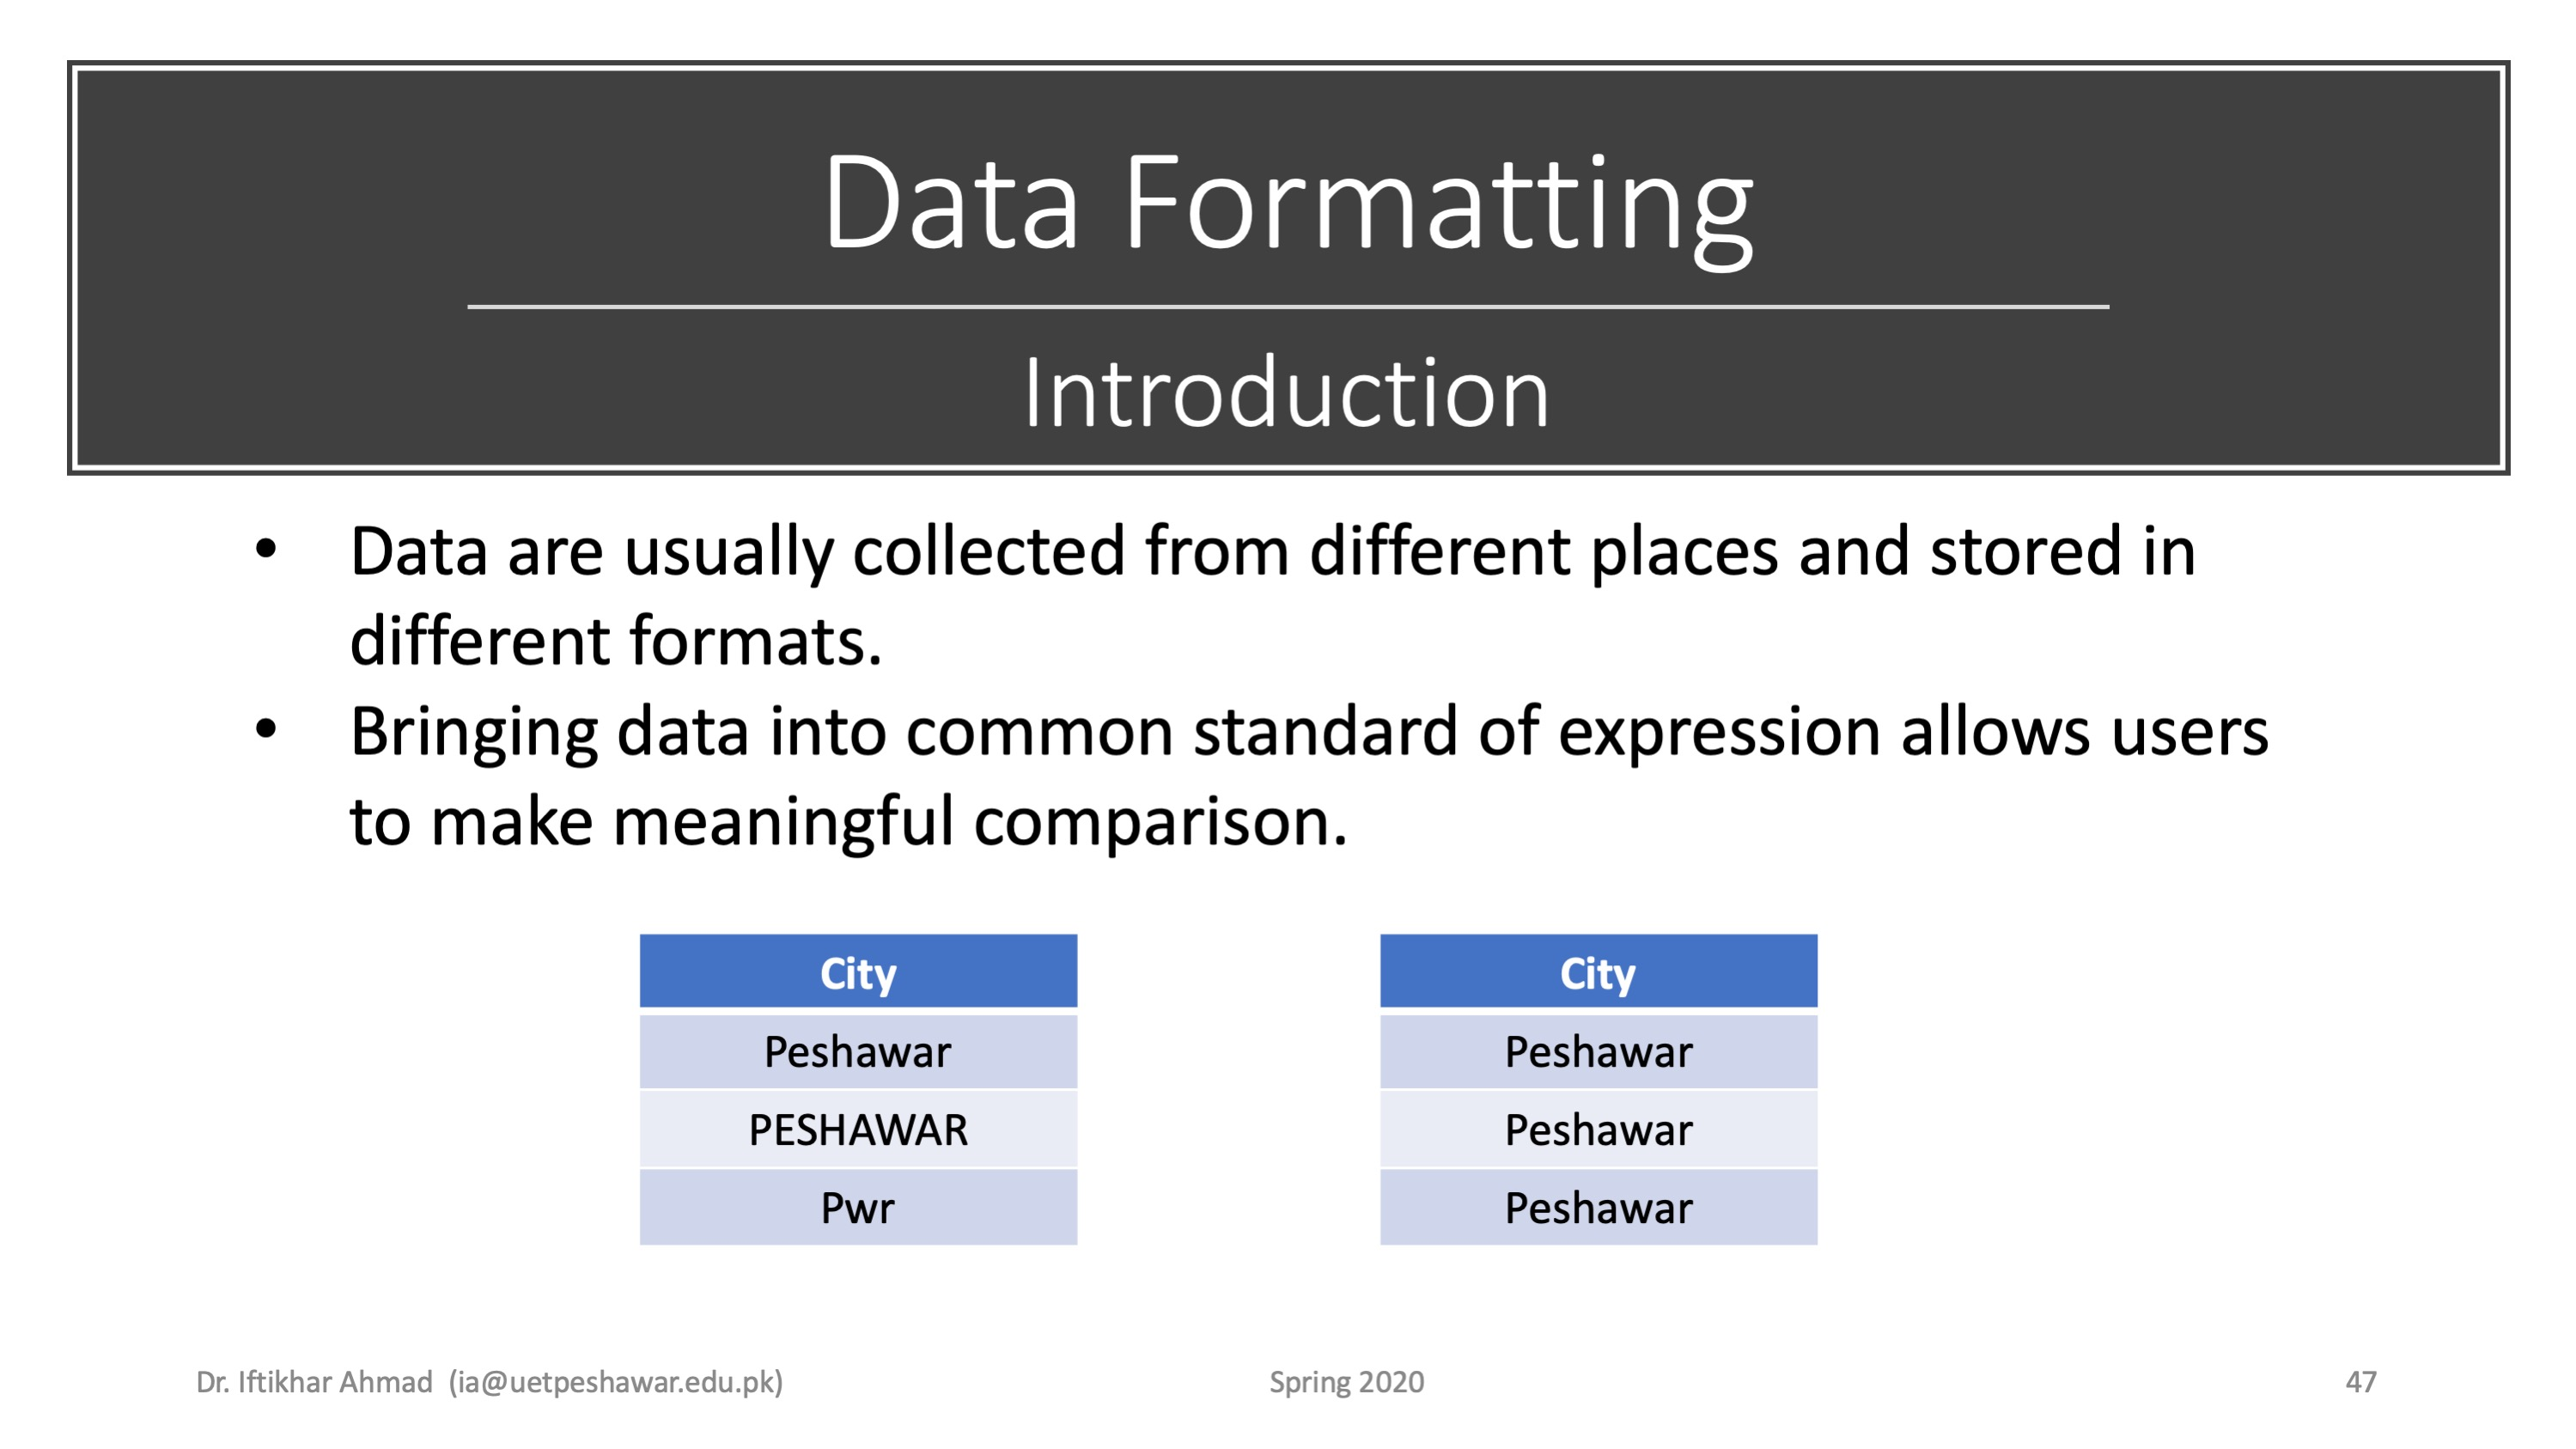

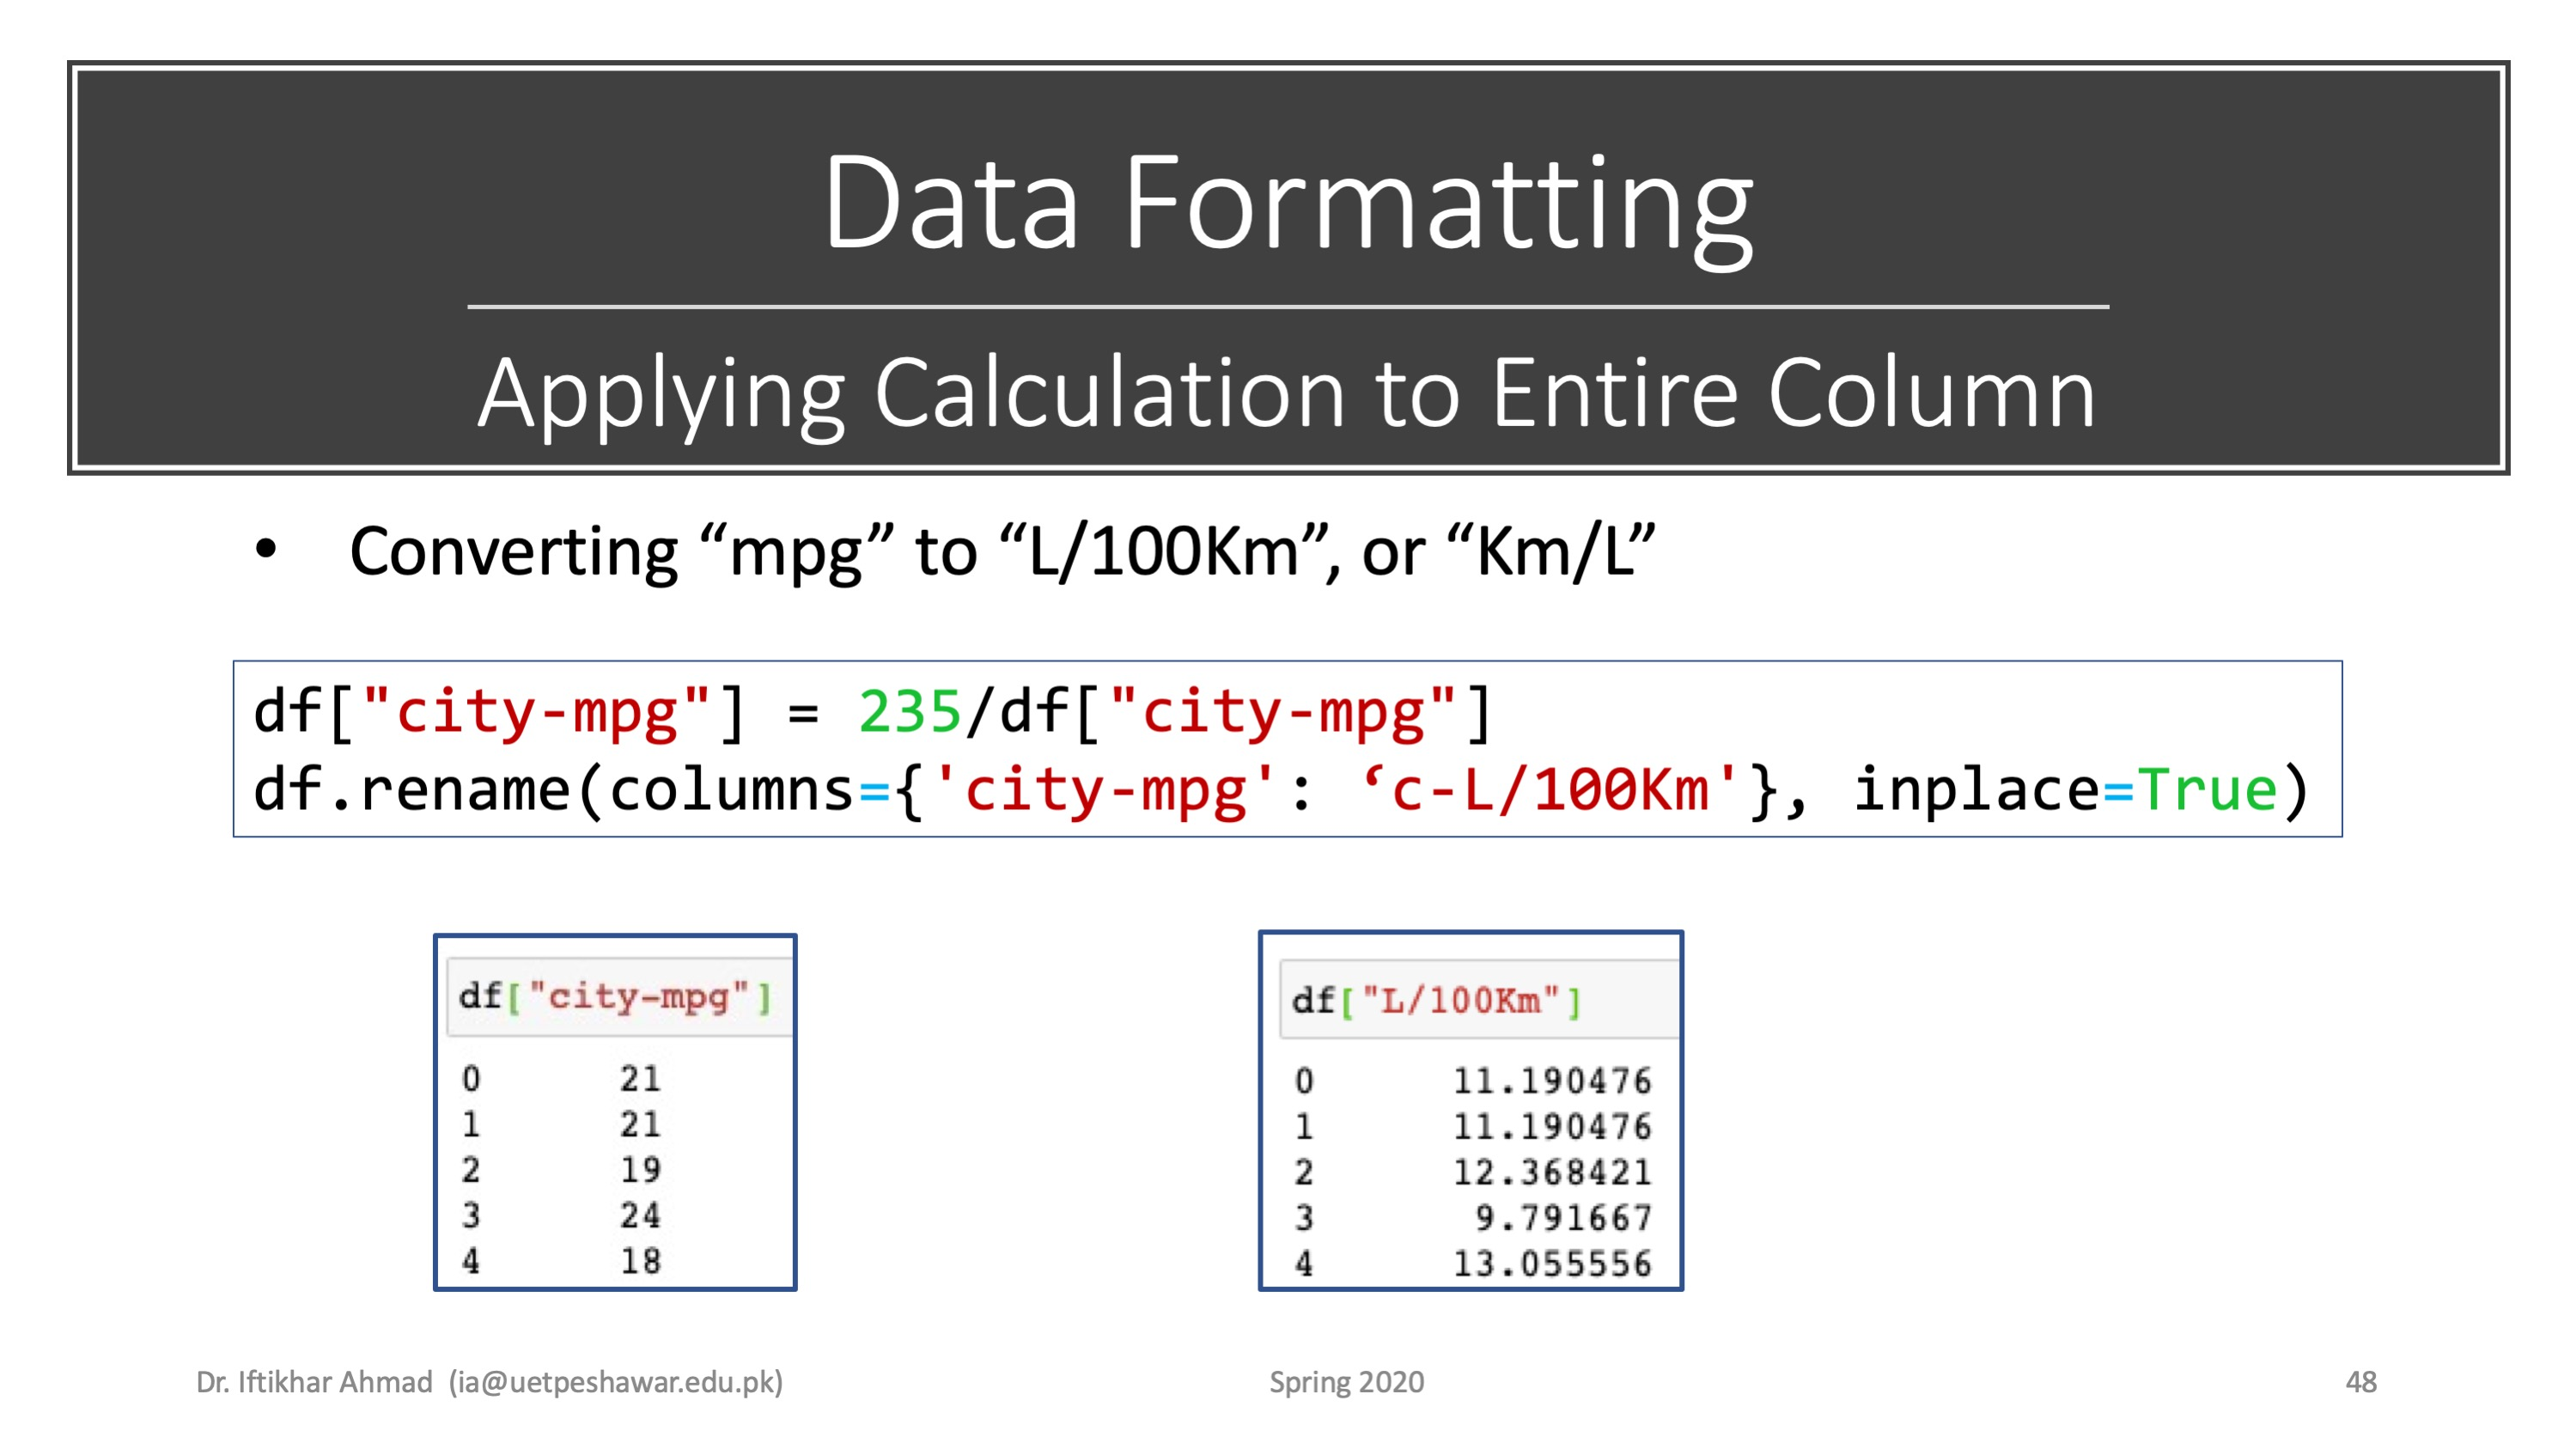

In [67]:
df["city-mpg"]

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [69]:
df["city-mpg"] = 235/df["city-mpg"]

In [70]:
df["city-mpg"]

0      21.0
1      21.0
2      19.0
3      24.0
4      18.0
       ... 
200    23.0
201    19.0
202    18.0
203    26.0
204    19.0
Name: city-mpg, Length: 205, dtype: float64

In [71]:
df.rename(columns={'city-mpg': 'c-L/100Km'}, inplace=True)

In [72]:
df["c-L/100Km"]

0      21.0
1      21.0
2      19.0
3      24.0
4      18.0
       ... 
200    23.0
201    19.0
202    18.0
203    26.0
204    19.0
Name: c-L/100Km, Length: 205, dtype: float64

In [73]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   

   peak-rpm c-L/100Km highway-mpg  Price  
0      5000      21.0          27  13495  
1      5000      21.0          27  16500  
2      5000      19.0          26  16500  
3      5500      24.0          30  13950  
4      5500      18.0          22  17450  

[5 rows x 26 columns]

In [74]:
df["Price"].dtypes

dtype('O')

In [75]:
df["Price"].replace("?", np.nan, inplace = True)
df["Price"] = pd.to_numeric(df["Price"])

In [76]:
df["Price"].dtypes

dtype('float64')

In [77]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg': 'h-L/100Km'}, inplace=True)

In [27]:
df["h-L/100Km"]

0       8.703704
1       8.703704
2       9.038462
3       7.833333
4      10.681818
         ...    
200     8.392857
201     9.400000
202    10.217391
203     8.703704
204     9.400000
Name: h-L/100Km, Length: 205, dtype: float64

In [78]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   

   peak-rpm c-L/100Km  h-L/100Km    Price  
0      5000      21.0   8.703704  13495.0  
1      5000      21.0   8.703704  16500.0  
2      5000      19.0   9.038462  16500.0  
3      5500      24.0   7.833333  13950.0  
4      5500      18.0  10.681818  17450.0  

[5 rows x 26 columns]

# Data Normalization

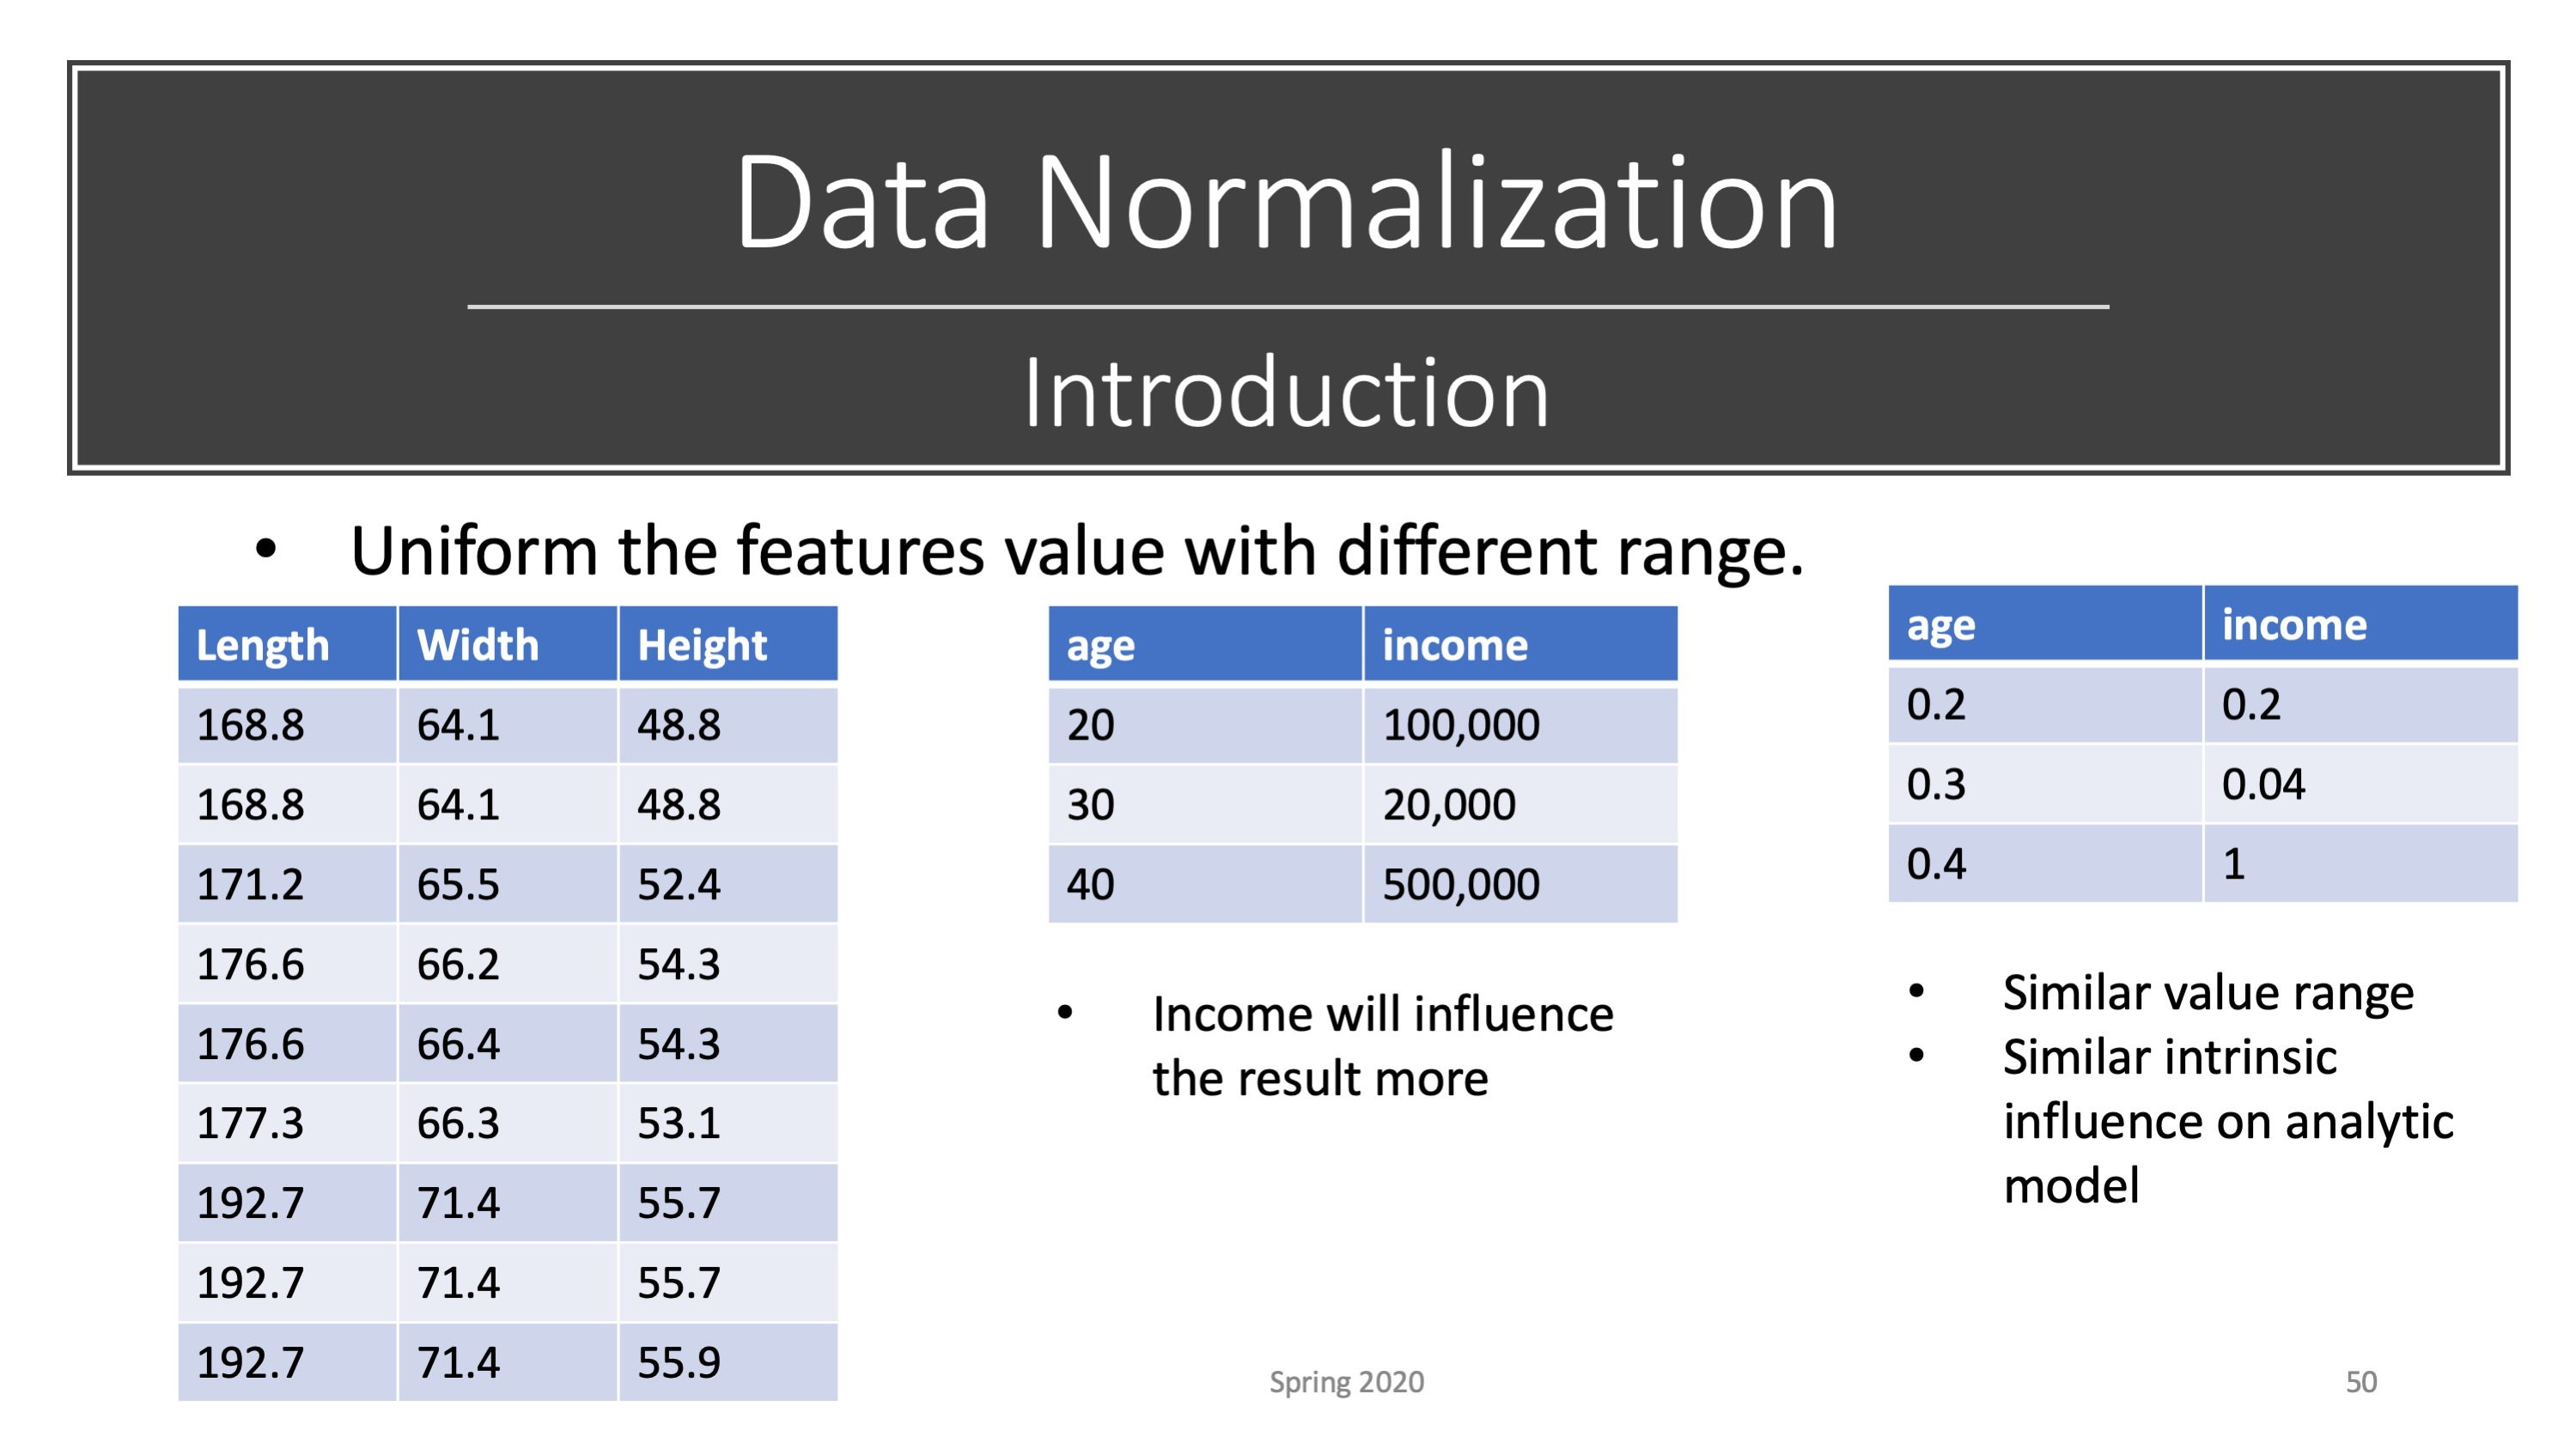

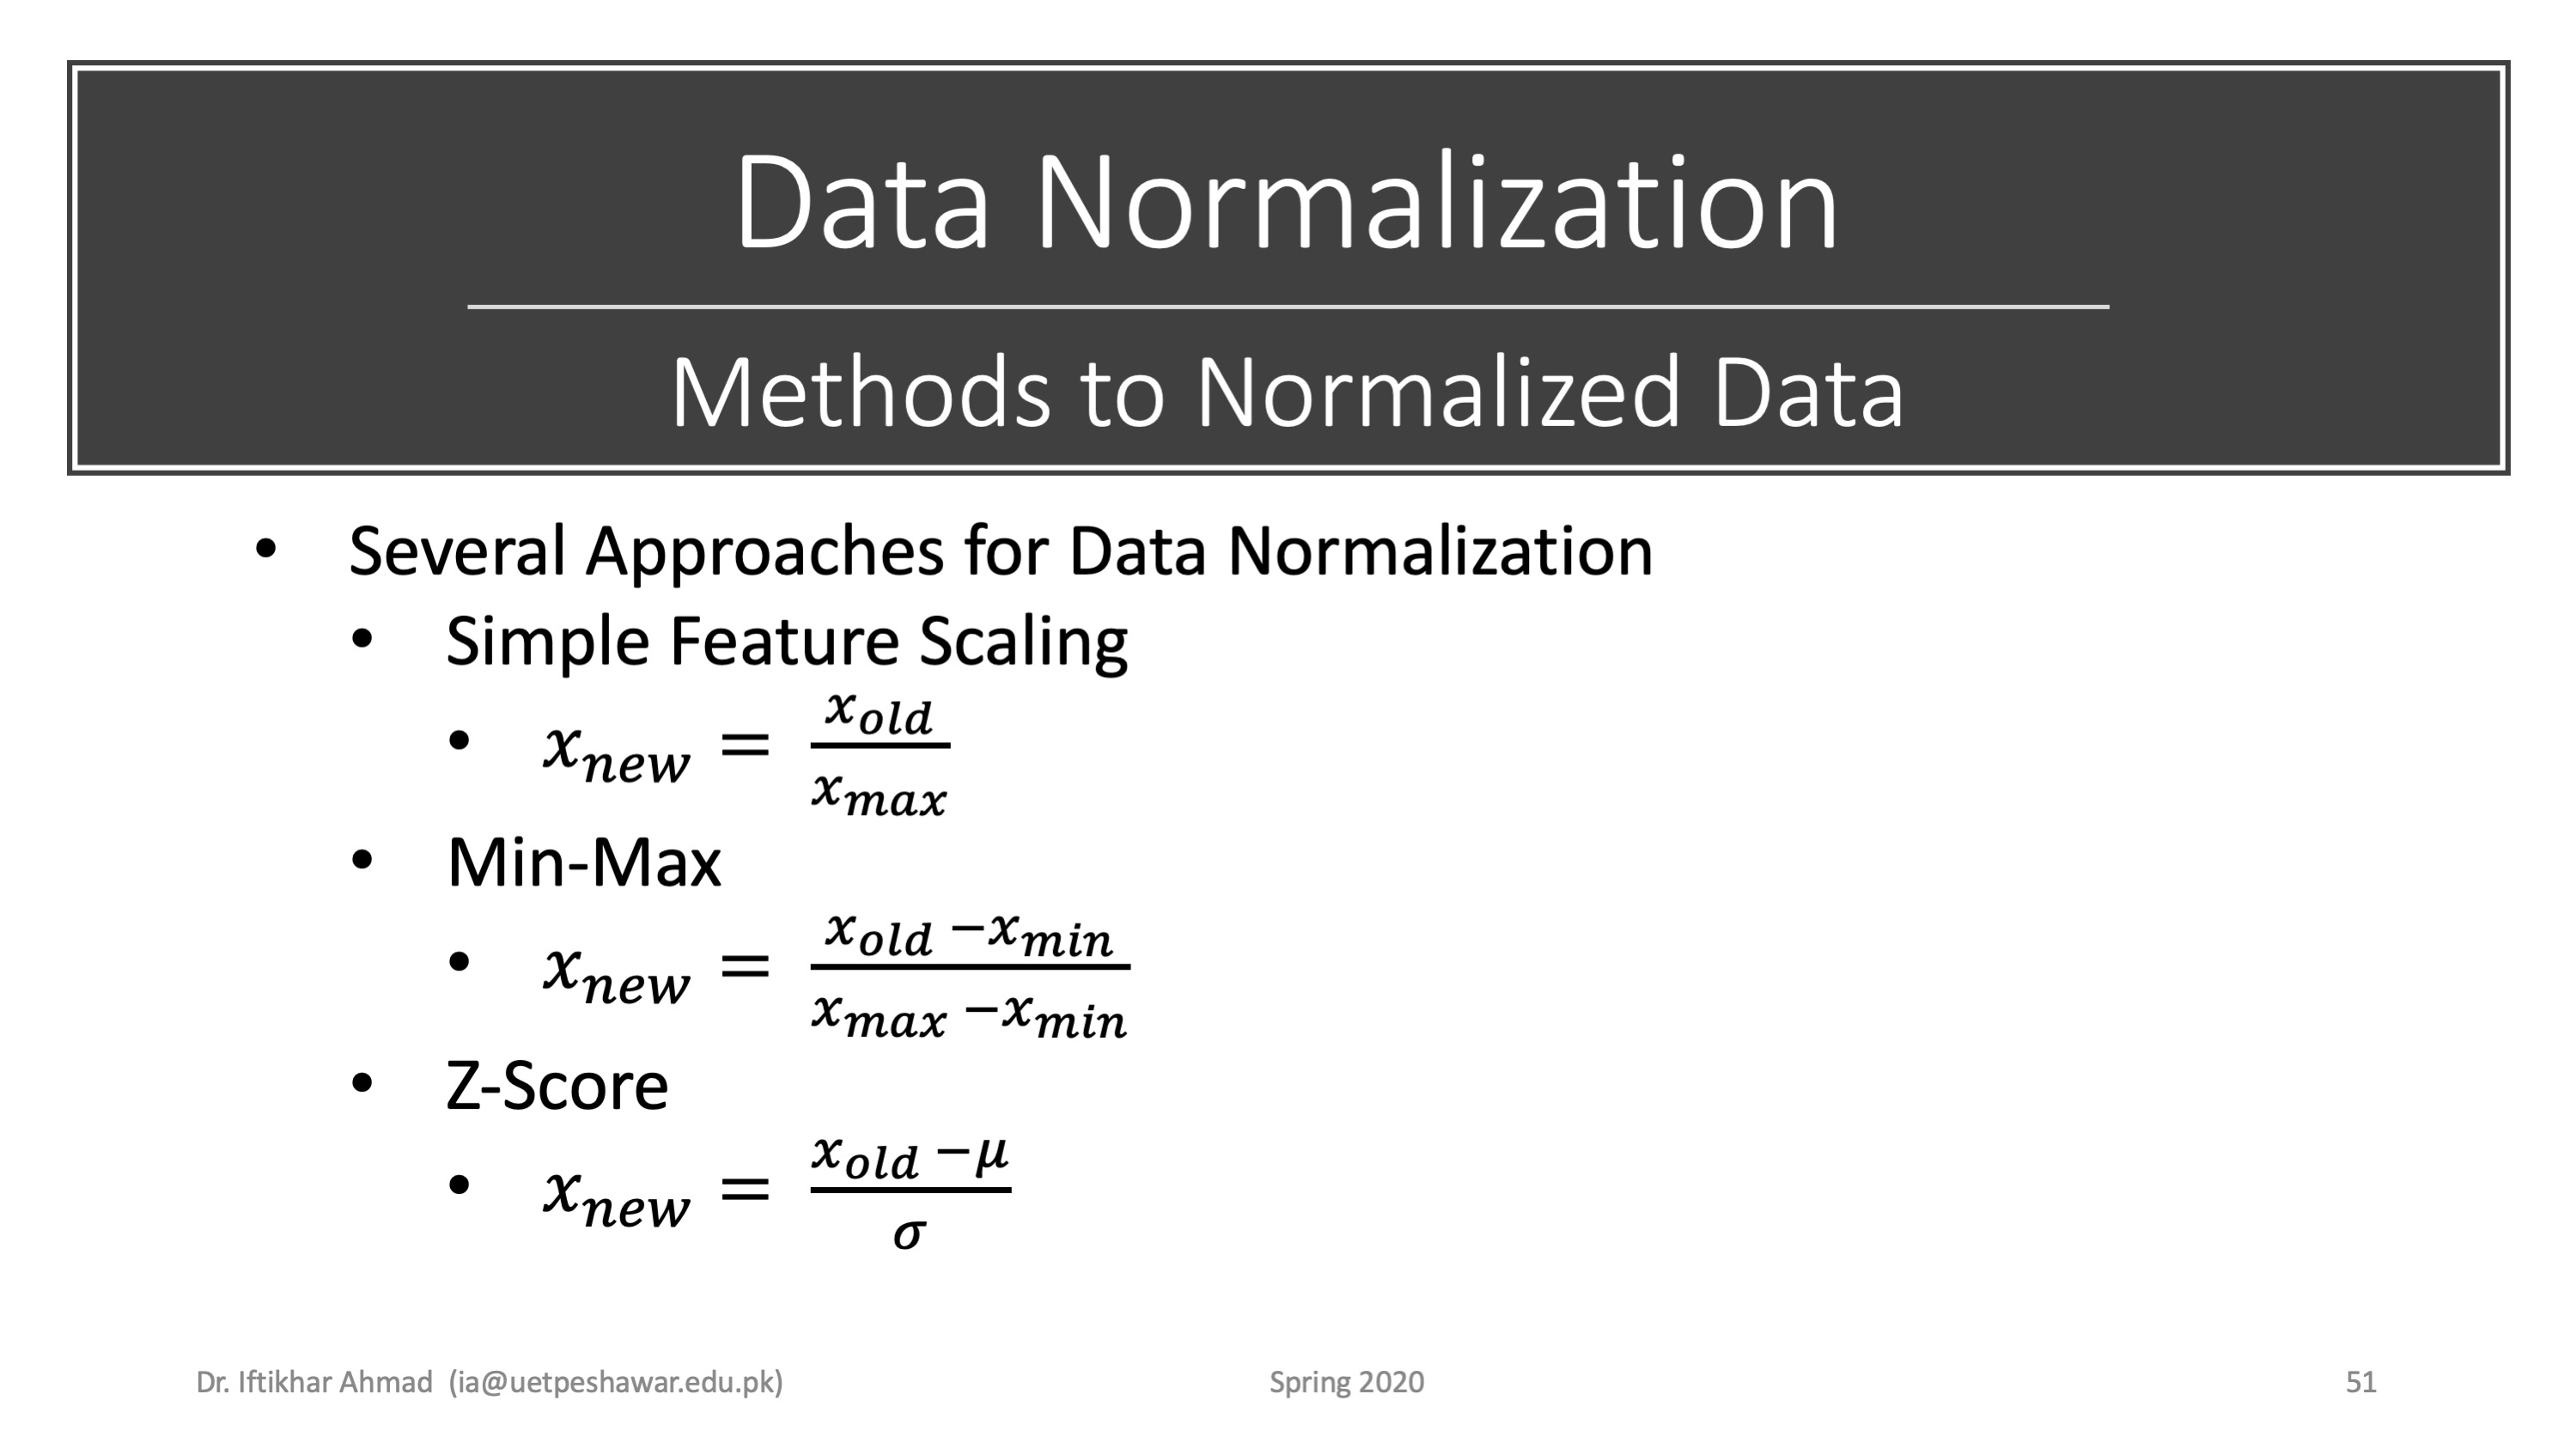

In [79]:
df["length"]

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64

In [80]:
df["length"] = df["length"]/ df["length"].max()

In [81]:
df['length']

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 205, dtype: float64

In [32]:
df["length"].max()

1.0

In [82]:
df["width"]

0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: width, Length: 205, dtype: float64

In [83]:
print(df["width"].max(), df["width"].min() )

72.3 60.3


In [84]:
df["width"] = (df["width"] - df["width"].min() ) / (df["width"].max() - df["width"].min() )

In [85]:
df['width']

0      0.316667
1      0.316667
2      0.433333
3      0.491667
4      0.508333
         ...   
200    0.716667
201    0.708333
202    0.716667
203    0.716667
204    0.716667
Name: width, Length: 205, dtype: float64

In [37]:
print(df["width"].max(), df["width"].min() )

1.0 0.0


In [38]:
df['height']

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 205, dtype: float64

In [86]:
print(df["height"].max(), df["height"].min() )

59.8 47.8


In [87]:
df["height"] = (df["height"] - df["height"].mean()) / df["height"].std()

In [41]:
df['height']

0     -2.015483
1     -2.015483
2     -0.542200
3      0.235366
4      0.235366
         ...   
200    0.726460
201    0.726460
202    0.726460
203    0.726460
204    0.726460
Name: height, Length: 205, dtype: float64

In [88]:
print(df["height"].max(), df["height"].min() )

2.4862153997559107 -2.424728781550963


# Binning

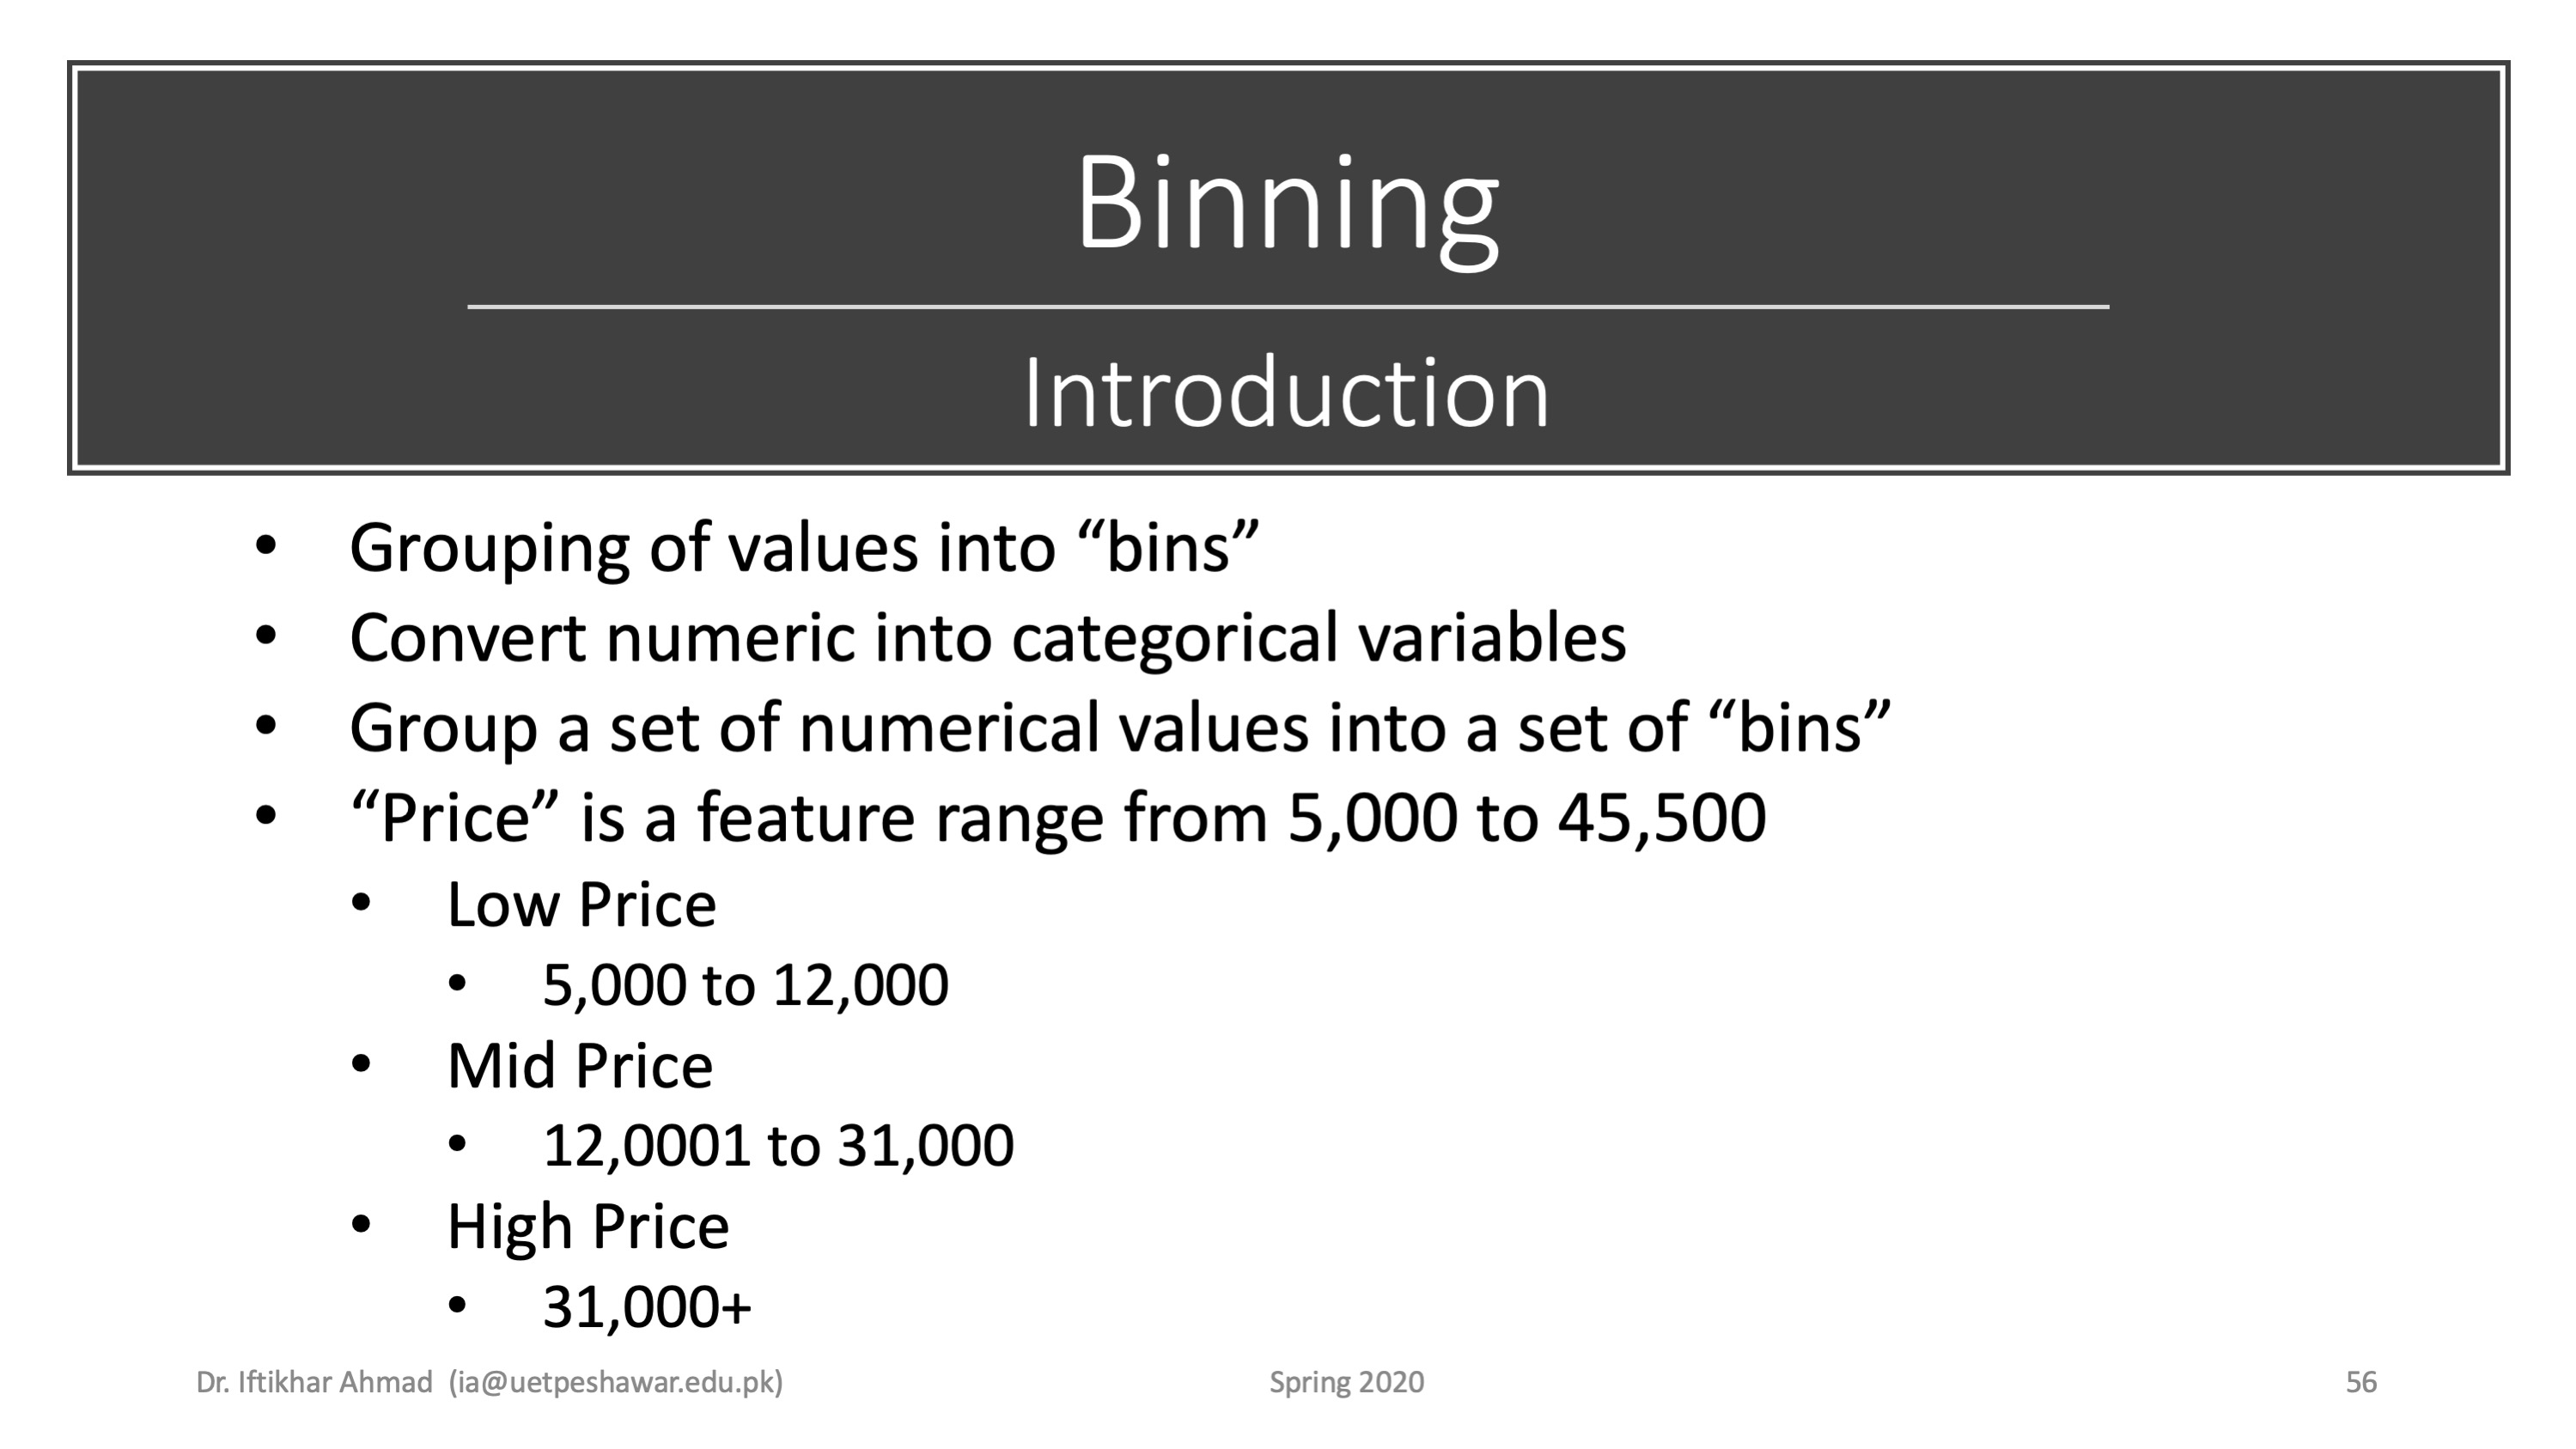

In [89]:
df["Price"].replace("?", np.nan, inplace = True)
df["Price"] = pd.to_numeric(df["Price"])

In [91]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)

In [92]:
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [46]:
group_names = ["Low", "Medium", "High"]

In [94]:
df["Priced-binned"] = pd.cut(df["Price"],bins, labels=group_names, include_lowest = True)

In [95]:
df[ ["Price", "Priced-binned"] ]

Price Priced-binned
0    13495.0           Low
1    16500.0           Low
2    16500.0           Low
3    13950.0           Low
4    17450.0           Low
..       ...           ...
200  16845.0           Low
201  19045.0        Medium
202  21485.0        Medium
203  22470.0        Medium
204  22625.0        Medium

[205 rows x 2 columns]

# Categorical Values into Quantitative Variables

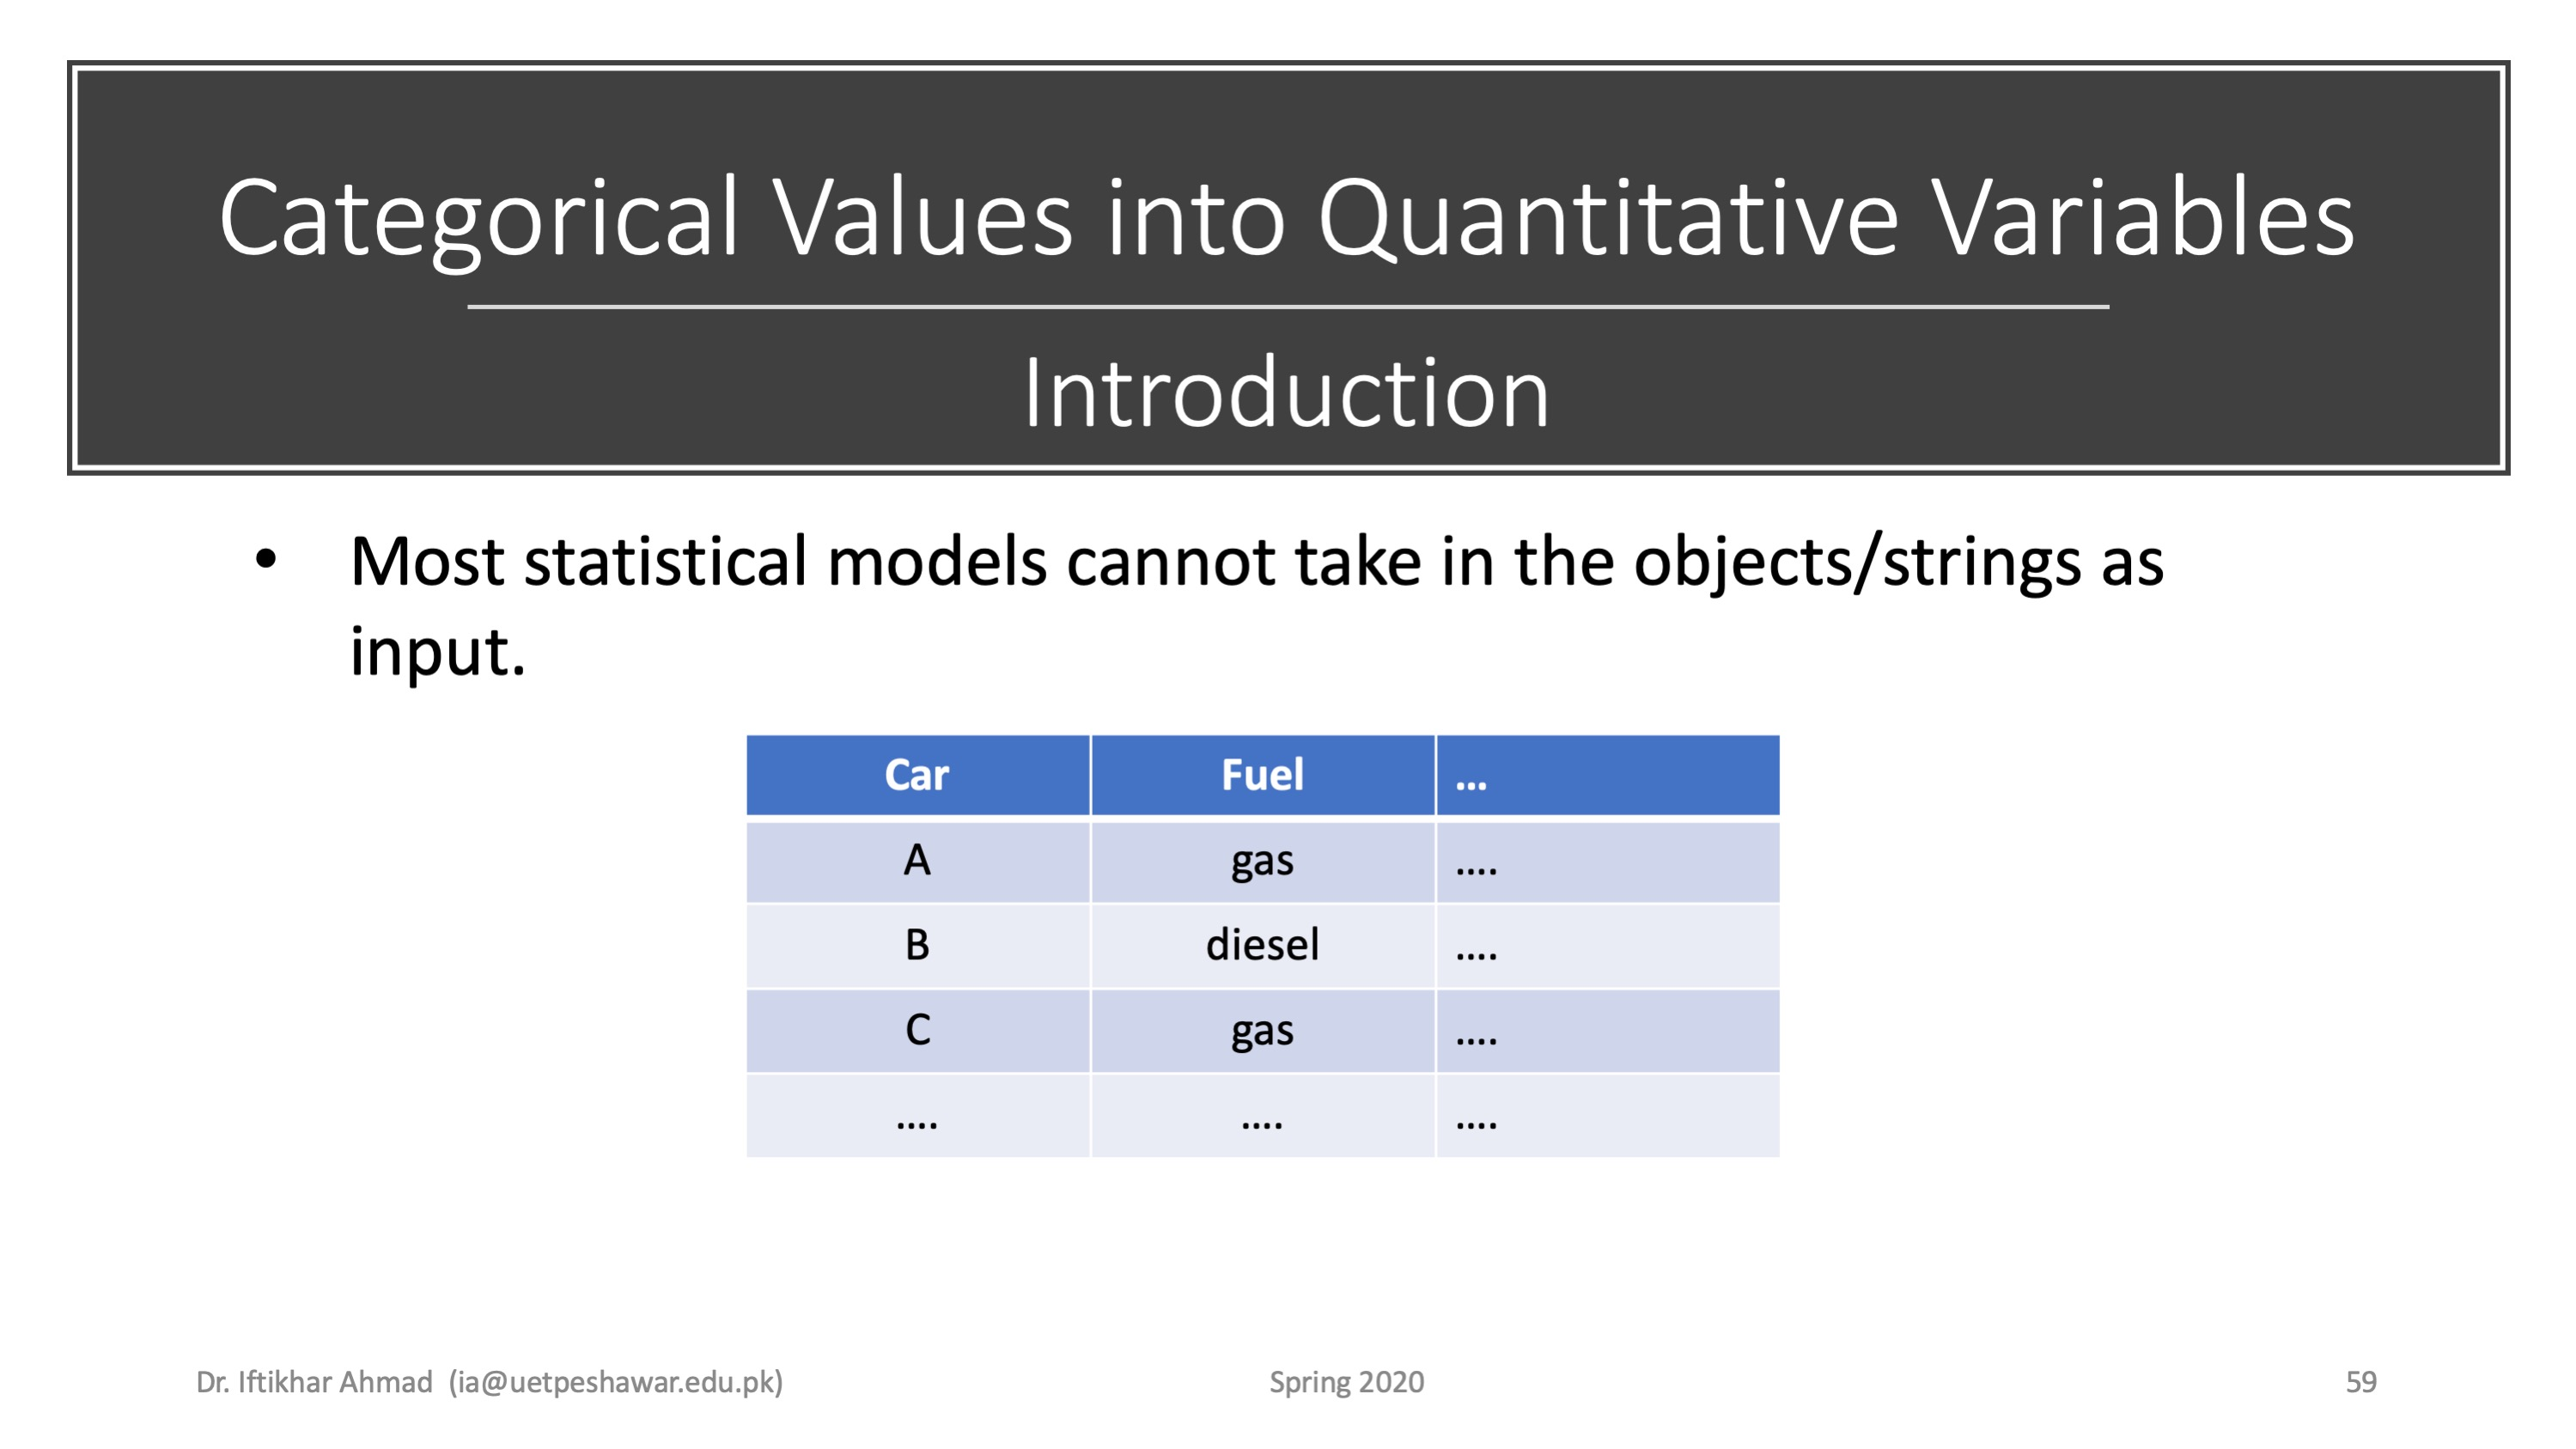

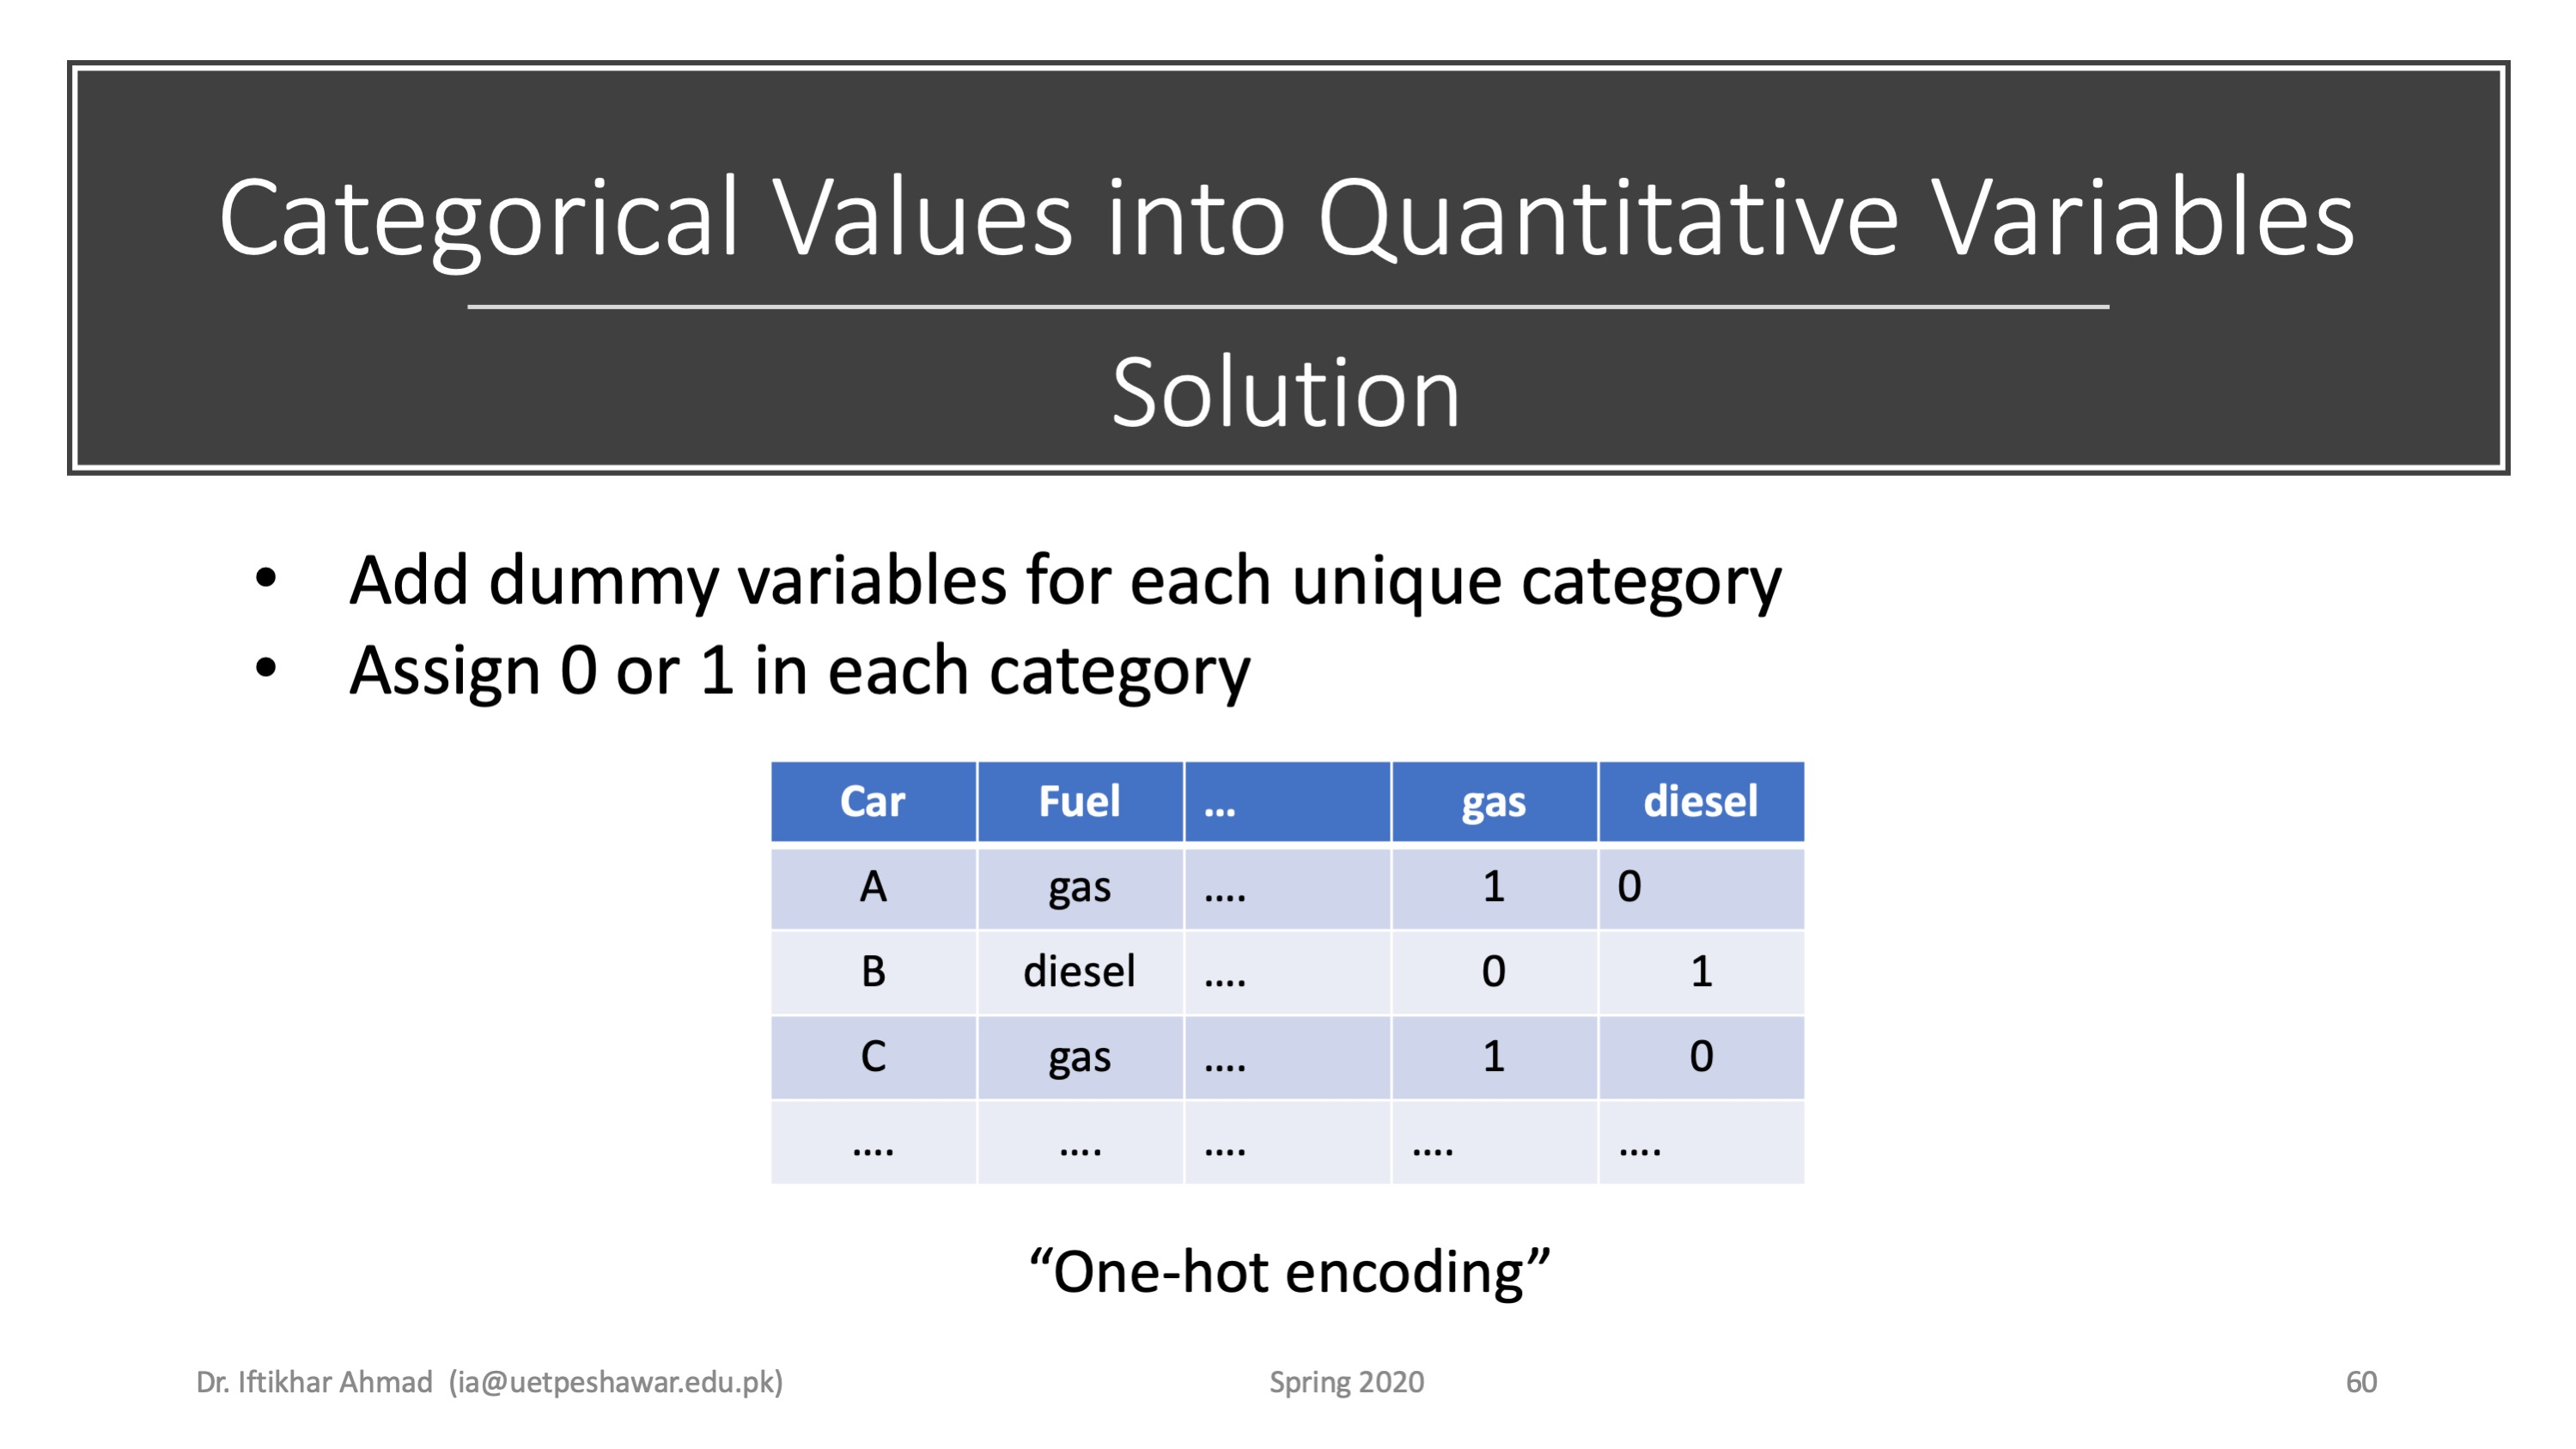

In [96]:
pd.get_dummies(df["fuel-type"])

diesel  gas
0         0    1
1         0    1
2         0    1
3         0    1
4         0    1
..      ...  ...
200       0    1
201       0    1
202       0    1
203       1    0
204       0    1

[205 rows x 2 columns]